In [199]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

## Data Preprocessing

In [200]:
# Load the dataset
df = pd.read_excel("/content/sample_data/ai4i2020.xlsx")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No Failure


In [203]:
# Check the shape of the dataset
print("\nShape of Dataset (rows, columns):")
print(df.shape)


Shape of Dataset (rows, columns):
(10000, 15)


In [204]:
# Check column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['UDI', 'Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type']


In [205]:
# Rename columns
df.rename(columns = {
    'UDI' : 'UID',
    'Product ID' : 'Product_ID',
    'Air temperature [K]' : 'Air temperature',
    'Process temperature [K]' : 'Process temperature',
    'Rotational speed [rpm]' : 'Rotational speed',
    'Torque [Nm]' : 'Torque',
    'Tool wear [min]' : 'Tool wear'
}, inplace = True)
df.head()

,UID,Product_ID,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,Machine failure,TWF,HDF,PWF,OSF,RNF,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,No Failure


In [206]:
# Check datatypes of each column
df.dtypes

,0
UID,int64
Product_ID,object
Type,object
Air temperature,float64
Process temperature,float64
Rotational speed,int64
Torque,float64
Tool wear,int64
Machine failure,int64
TWF,int64


In [207]:
# Check summary statistics
print("\nStatistical Summary:")
print(df.describe(include = 'all'))


Statistical Summary:
                UID Product_ID   Type  Air temperature  Process temperature  \
count   10000.00000      10000  10000     10000.000000         10000.000000   
unique          NaN      10000      3              NaN                  NaN   
top             NaN     L57163      L              NaN                  NaN   
freq            NaN          1   6000              NaN                  NaN   
mean     5000.50000        NaN    NaN       300.004930           310.005560   
std      2886.89568        NaN    NaN         2.000259             1.483734   
min         1.00000        NaN    NaN       295.300000           305.700000   
25%      2500.75000        NaN    NaN       298.300000           308.800000   
50%      5000.50000        NaN    NaN       300.100000           310.100000   
75%      7500.25000        NaN    NaN       301.500000           311.100000   
max     10000.00000        NaN    NaN       304.500000           313.800000   

        Rotational speed     

In [208]:
# Check for null values
print("\nNull Values per Column:")
print(df.isnull().sum())


Null Values per Column:
UID                    0
Product_ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
Failure Type           0
dtype: int64


In [209]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())


Number of Duplicate Rows:
0


In [210]:
# Check for unique values in "Product ID" column
if "Product_ID" in df.columns:
    print("\nNumber of Unique Product IDs:", df['Product_ID'].nunique())
    print("Unique Product IDs Sample:", df['Product_ID'].unique()[:5])


Number of Unique Product IDs: 10000
Unique Product IDs Sample: ['M14860' 'L47181' 'L47182' 'L47183' 'L47184']


In [211]:
# Extract Product IDs
df['Product_ID_clean'] = [''.join(filter(str.isdigit, pid)) for pid in df['Product_ID']]
df['Product_ID_clean']

,Product_ID_clean
0,14860
1,47181
2,47182
3,47183
4,47184
...,...
9995,24855
9996,39410
9997,24857
9998,39412


In [212]:
# Convert numeric columns to float
df['Rotational speed'] = df['Rotational speed'].astype('float64')
df['Tool wear'] = df['Tool wear'].astype('float64')

In [213]:
# Filter rows where Failure Type is "Random Failures" AND Machine failure = 0
filtered_df = df[(df['Failure Type'] == 'Random Failures') & (df['Machine failure'] == 0)]

# Display the result (only the specified columns)
result = filtered_df[['Machine failure', 'Failure Type']]
print(f"Found {len(result)} entries")
result

Found 18 entries


,Machine failure,Failure Type
1221,0,Random Failures
1302,0,Random Failures
1748,0,Random Failures
2072,0,Random Failures
2559,0,Random Failures
3065,0,Random Failures
3452,0,Random Failures
5471,0,Random Failures
5489,0,Random Failures
5495,0,Random Failures


In [214]:
# Get indices of rows to remove
indices_to_drop = df[(df['Failure Type'] == 'Random Failures') & (df['Machine failure'] == 0)].index

# Drop these rows (inplace=True modifies the original DataFrame)
df.drop(indices_to_drop, inplace=True)

# Verify removal
print(f"Removed {len(indices_to_drop)} entries")
print(df['Failure Type'].value_counts())

Removed 18 entries
Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64


In [215]:
# Print the shape of the DataFrame after removal
print("DataFrame shape after removal:", df.shape)

DataFrame shape after removal: (9982, 16)


In [216]:
# Filter rows where Failure Type is "No Failure" AND Machine failure = 1
inconsistent_data = df[(df['Failure Type'] == 'No Failure') & (df['Machine failure'] == 1)]

# Display the result (selected columns)
result = inconsistent_data[['Machine failure', 'Failure Type']]
print(f"Found {len(result)} inconsistent entries:")
result

Found 9 inconsistent entries:


,Machine failure,Failure Type
1437,1,No Failure
2749,1,No Failure
4044,1,No Failure
4684,1,No Failure
5536,1,No Failure
5941,1,No Failure
6478,1,No Failure
8506,1,No Failure
9015,1,No Failure


In [217]:
# Get indices of inconsistent rows
inconsistent_indices = df[(df['Failure Type'] == 'No Failure') & (df['Machine failure'] == 1)].index

# Drop them (inplace=True modifies the original DataFrame)
df.drop(inconsistent_indices, inplace=True)

# Verify removal
print(f"Removed {len(inconsistent_indices)} inconsistent rows. New shape:", df.shape)

Removed 9 inconsistent rows. New shape: (9973, 16)


In [218]:
# examine the data structure
print("Dataset info:")
print(f"Shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

# Check for any columns with string values
print("\nChecking for string columns:")
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"{col}: {df[col].unique()[:10]}")

Dataset info:
Shape: (9973, 16)
Columns: ['UID', 'Product_ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type', 'Product_ID_clean']
Data types:
UID                      int64
Product_ID              object
Type                    object
Air temperature        float64
Process temperature    float64
Rotational speed       float64
Torque                 float64
Tool wear              float64
Machine failure          int64
TWF                      int64
HDF                      int64
PWF                      int64
OSF                      int64
RNF                      int64
Failure Type            object
Product_ID_clean        object
dtype: object

Checking for string columns:
Product_ID: ['M14860' 'L47181' 'L47182' 'L47183' 'L47184' 'M14865' 'L47186' 'L47187'
 'M14868' 'M14869']
Type: ['M' 'L' 'H']
Failure Type: ['No Failure' 'Power Failure' 'Tool Wear Failure' 'Overstrain F

**Feature Engineering**

In [219]:
# 1. Create new features
df['Temp_diff'] = df['Process temperature'] - df['Air temperature']
df['Power'] = df['Torque'] * df['Rotational speed'] / 1000
df['Tool_wear_intensity'] = df['Tool wear'] / (df['Rotational speed'] / 1000)
df['Efficiency_ratio'] = df['Rotational speed'] / (df['Torque'] + 0.1)

# 2. Encode product type
le = LabelEncoder()
df['Type_encoded'] = le.fit_transform(df['Type'])

# Show the mapping
print("Type encoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"  '{label}' -> {i}")

# 3. Create binary features
df['High_temp'] = (df['Air temperature'] > df['Air temperature'].quantile(0.75)).astype(int)
df['High_torque'] = (df['Torque'] > df['Torque'].quantile(0.75)).astype(int)
df['High_wear'] = (df['Tool wear'] > df['Tool wear'].quantile(0.75)).astype(int)

# 4. Scale numerical features
scaler = StandardScaler()
numerical_cols = ['Air temperature', 'Process temperature', 'Rotational speed',
                  'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio']
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(f"Dataset shape: {df.shape}")
print("Features created: Temp_diff, Power, Tool_wear_intensity, Efficiency_ratio, Type_encoded")

Type encoding mapping:
  'H' -> 0
  'L' -> 1
  'M' -> 2
Dataset shape: (9973, 24)
Features created: Temp_diff, Power, Tool_wear_intensity, Efficiency_ratio, Type_encoded


In [220]:
# Print all column names
print("Current columns in the DataFrame:")
print(df.columns.tolist())

Current columns in the DataFrame:
['UID', 'Product_ID', 'Type', 'Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Failure Type', 'Product_ID_clean', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'Type_encoded', 'High_temp', 'High_torque', 'High_wear']


**Exploratory Data Analysis**

In [167]:
# 1. Dataset Overview
print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Total samples: {len(df)}")
print(f"Features: {df.shape[1]}")


1. DATASET OVERVIEW
------------------------------
Dataset shape: (9973, 24)
Total samples: 9973
Features: 24


In [168]:
# 2. Target Variable Analysis
print("\n2. TARGET VARIABLE ANALYSIS")
print("-" * 30)
print("Machine Failure Distribution:")
print(df['Machine failure'].value_counts())
print(f"Failure rate: {df['Machine failure'].mean():.4f}")
print(f"Class imbalance ratio: {df['Machine failure'].value_counts()[0] / df['Machine failure'].value_counts()[1]:.2f}:1")

print("\nFailure Type Distribution:")
print(df['Failure Type'].value_counts())


2. TARGET VARIABLE ANALYSIS
------------------------------
Machine Failure Distribution:
Machine failure
0    9643
1     330
Name: count, dtype: int64
Failure rate: 0.0331
Class imbalance ratio: 29.22:1

Failure Type Distribution:
Failure Type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Name: count, dtype: int64


In [107]:
# 3. Correlation Analysis
print("\n3. CORRELATION ANALYSIS")
print("-" * 30)
numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Efficiency_ratio']

# Calculate correlations with target
correlations = df[numerical_features + ['Machine failure']].corr()['Machine failure'].sort_values(ascending=False)
print("Feature correlations with Machine failure:")
print(correlations[:-1])


3. CORRELATION ANALYSIS
------------------------------
Feature correlations with Machine failure:
Machine failure        1.000000
Torque                 0.193420
Power                  0.177987
Tool wear              0.106337
Air temperature        0.083066
Efficiency_ratio       0.063526
Process temperature    0.035997
Rotational speed      -0.044042
Name: Machine failure, dtype: float64


In [108]:
# 4. Statistical Tests for Feature Importance
print("\n4. FEATURE IMPORTANCE ANALYSIS")
print("-" * 30)
from scipy.stats import chi2_contingency, ttest_ind

# Test for categorical features
categorical_features = ['Type', 'High_temp', 'High_torque', 'High_wear']
print("Chi-square tests for categorical features:")
for feature in categorical_features:
    if feature in df.columns:
        contingency_table = pd.crosstab(df[feature], df['Machine failure'])
        chi2, p_value, dof, expected = chi2_contingency(contingency_table)
        print(f"{feature}: Chi2={chi2:.4f}, p-value={p_value:.4e}")

# T-tests for numerical features
print("\nT-tests for numerical features:")
for feature in numerical_features:
    if feature in df.columns:
        failed = df[df['Machine failure'] == 1][feature]
        normal = df[df['Machine failure'] == 0][feature]
        t_stat, p_value = ttest_ind(failed, normal)
        print(f"{feature}: t-stat={t_stat:.4f}, p-value={p_value:.4e}")


4. FEATURE IMPORTANCE ANALYSIS
------------------------------
Chi-square tests for categorical features:
Type: Chi2=15.1649, p-value=5.0932e-04
High_temp: Chi2=131.7006, p-value=1.7397e-30
High_torque: Chi2=417.9105, p-value=6.9543e-93
High_wear: Chi2=127.4596, p-value=1.4737e-29

T-tests for numerical features:
Air temperature: t-stat=8.3233, p-value=9.6744e-17
Process temperature: t-stat=3.5968, p-value=3.2366e-04
Rotational speed: t-stat=-4.4021, p-value=1.0835e-05
Torque: t-stat=19.6857, p-value=1.1454e-84
Tool wear: t-stat=10.6788, p-value=1.7784e-26
Temp_diff: t-stat=-11.3165, p-value=1.6451e-29
Power: t-stat=18.0613, p-value=8.9019e-72
Efficiency_ratio: t-stat=6.3562, p-value=2.1588e-10


**Visualization**

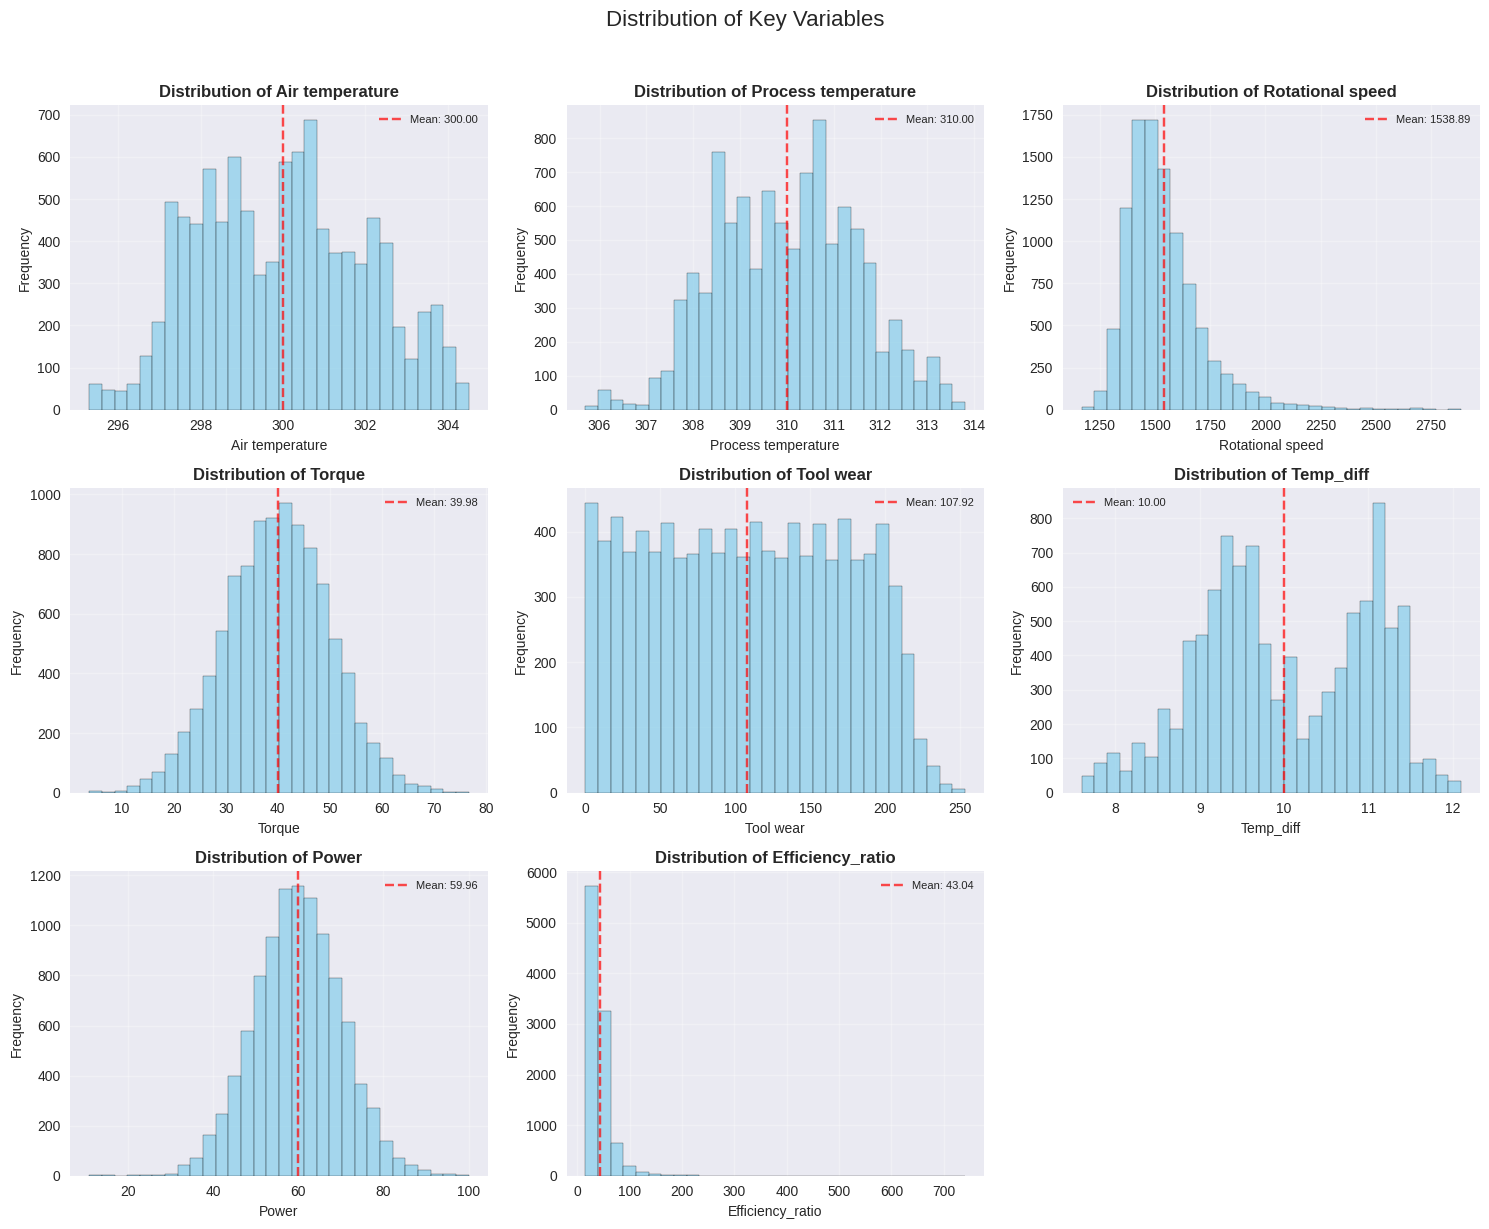

In [109]:
# Distribution Plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Distribution of Key Variables', fontsize=16, y=1.02)

numerical_features = ['Air temperature', 'Process temperature', 'Rotational speed',
                     'Torque', 'Tool wear', 'Temp_diff', 'Power', 'Efficiency_ratio']

for i, col in enumerate(numerical_features):
    row, col_idx = i // 3, i % 3
    if i < len(numerical_features):
        axes[row, col_idx].hist(df[col], bins=30, alpha=0.7, edgecolor='black', color='skyblue')
        axes[row, col_idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[row, col_idx].set_xlabel(f'{col}', fontsize=10)
        axes[row, col_idx].set_ylabel('Frequency', fontsize=10)
        axes[row, col_idx].grid(True, alpha=0.3)

        # Add basic statistics as text
        mean_val = df[col].mean()
        std_val = df[col].std()
        axes[row, col_idx].axvline(mean_val, color='red', linestyle='--', alpha=0.7, label=f'Mean: {mean_val:.2f}')
        axes[row, col_idx].legend(fontsize=8)

# Remove empty subplot
if len(numerical_features) < 9:
    axes[2, 2].remove()

plt.tight_layout()
plt.show()

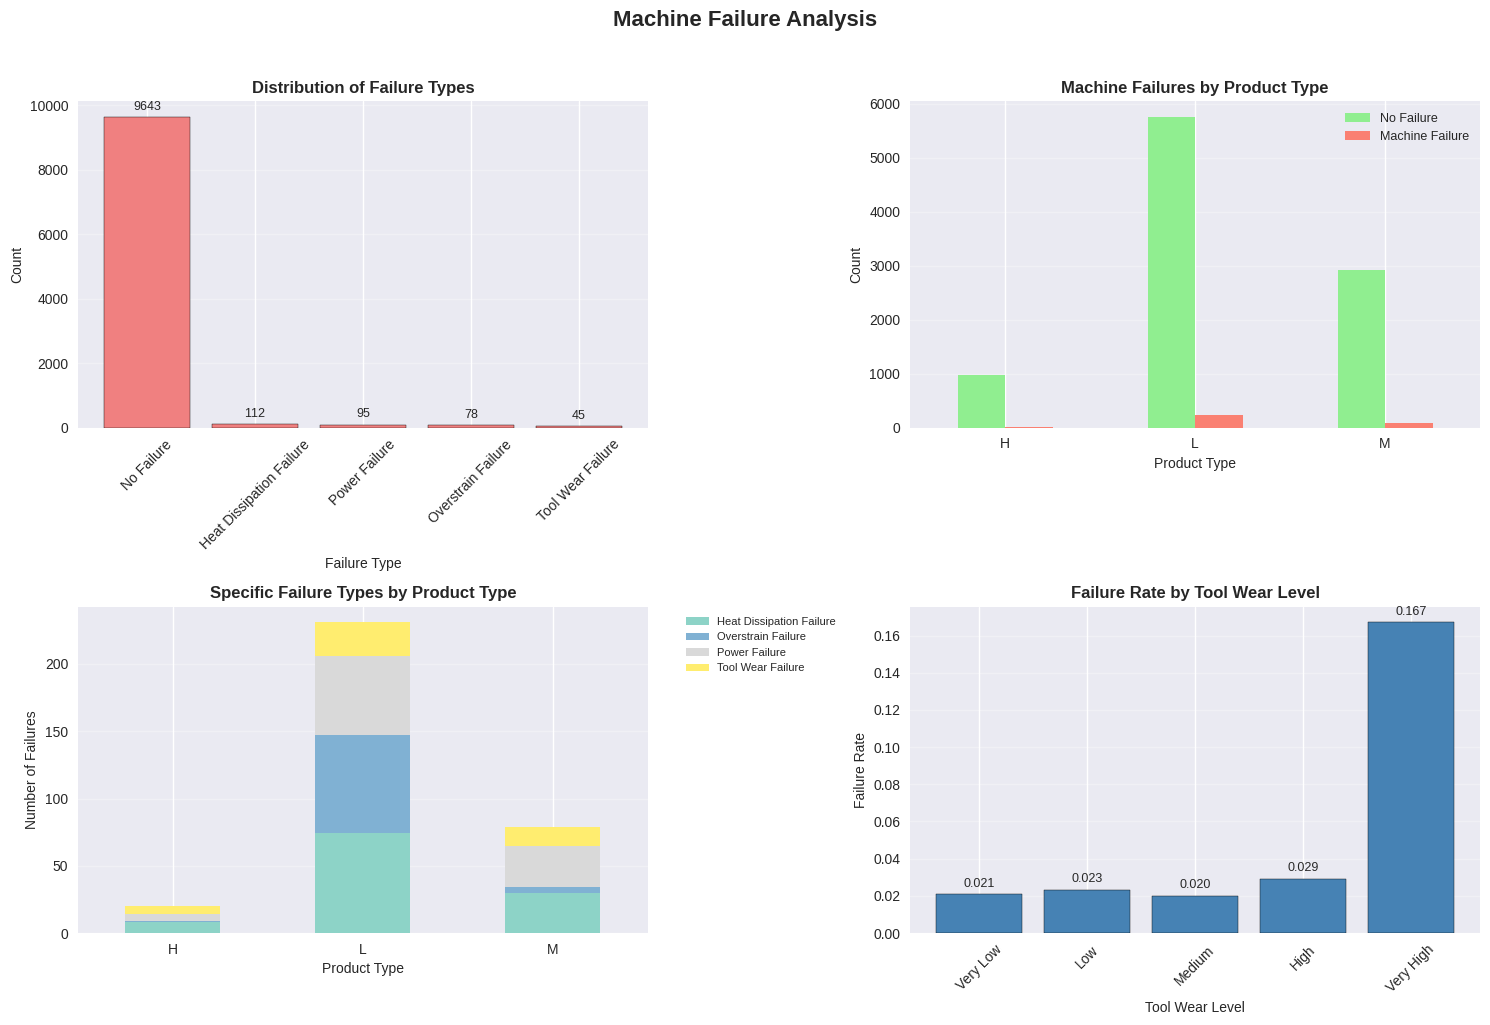

In [169]:
# FAILURE ANALYSIS
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Machine Failure Analysis', fontsize=16, fontweight='bold', y=1.02)

# Failure distribution
failure_counts = df['Failure Type'].value_counts()
bars = axes[0, 0].bar(failure_counts.index, failure_counts.values, color='lightcoral', edgecolor='black')
axes[0, 0].set_title('Distribution of Failure Types', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Failure Type', fontsize=10)
axes[0, 0].set_ylabel('Count', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[0, 0].annotate(f'{int(height)}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

# Failure by Product Type
failure_by_type = pd.crosstab(df['Type'], df['Machine failure'])
failure_by_type.plot(kind='bar', ax=axes[0, 1], color=['lightgreen', 'salmon'])
axes[0, 1].set_title('Machine Failures by Product Type', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Product Type', fontsize=10)
axes[0, 1].set_ylabel('Count', fontsize=10)
axes[0, 1].legend(['No Failure', 'Machine Failure'], fontsize=9)
axes[0, 1].tick_params(axis='x', rotation=0)
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Specific failure types by product
specific_failures = df[df['Machine failure'] == 1]
failure_product = pd.crosstab(specific_failures['Type'], specific_failures['Failure Type'])
failure_product.plot(kind='bar', stacked=True, ax=axes[1, 0], colormap='Set3')
axes[1, 0].set_title('Specific Failure Types by Product Type', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Product Type', fontsize=10)
axes[1, 0].set_ylabel('Number of Failures', fontsize=10)
axes[1, 0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[1, 0].tick_params(axis='x', rotation=0)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Failure rate by Tool Wear levels (more meaningful than UDI)
df['Tool_wear_level'] = pd.cut(df['Tool wear'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
failure_rate = df.groupby('Tool_wear_level')['Machine failure'].mean()
axes[1, 1].bar(range(len(failure_rate)), failure_rate.values, color='steelblue', edgecolor='black')
axes[1, 1].set_title('Failure Rate by Tool Wear Level', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Tool Wear Level', fontsize=10)
axes[1, 1].set_ylabel('Failure Rate', fontsize=10)
axes[1, 1].set_xticks(range(len(failure_rate)))
axes[1, 1].set_xticklabels(failure_rate.index, rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, v in enumerate(failure_rate.values):
    axes[1, 1].annotate(f'{v:.3f}',
                        xy=(i, v),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

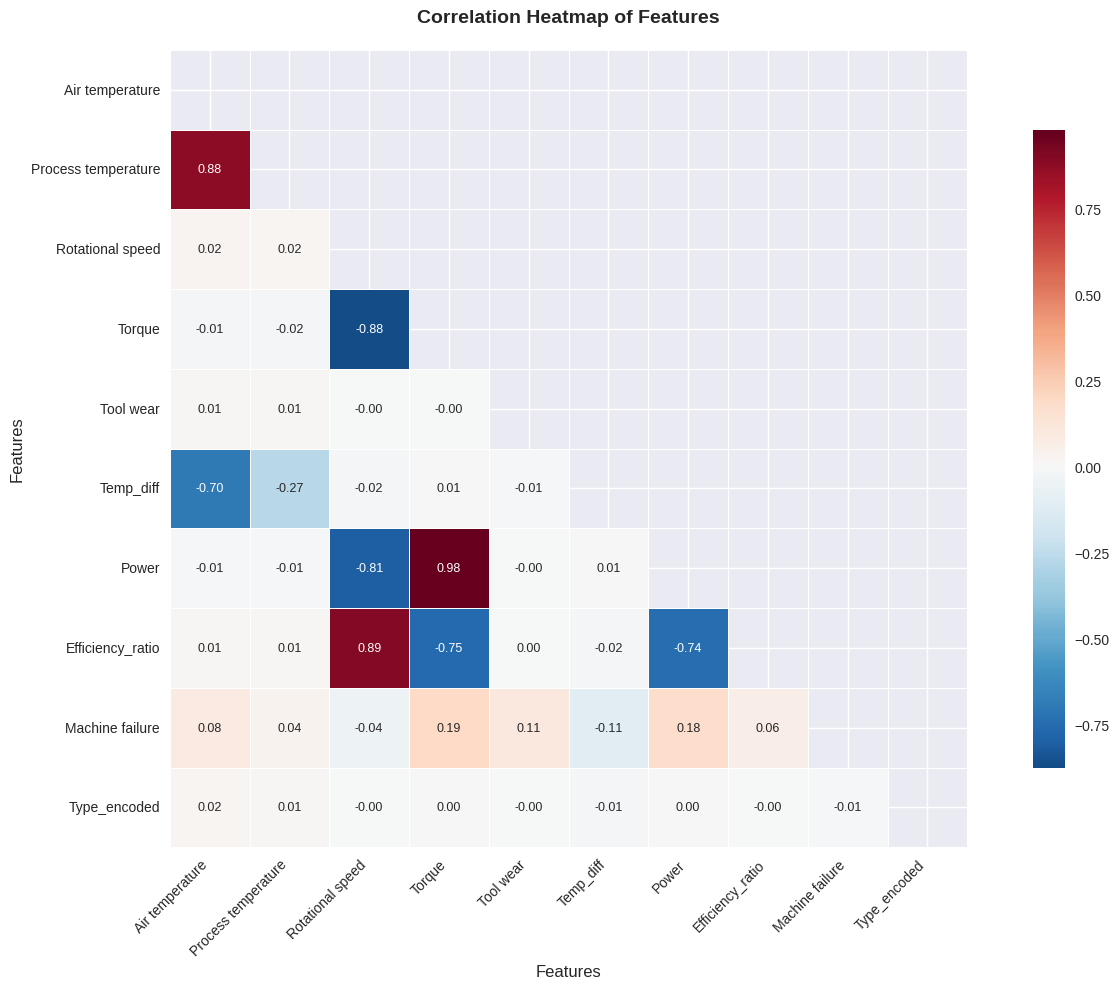

In [111]:
# CORRELATION HEATMAP
plt.figure(figsize=(14, 10))
correlation_cols = numerical_features + ['Machine failure', 'Type_encoded']
corr_matrix = df[correlation_cols].corr()

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, fmt='.2f', mask=mask, linewidths=0.5,
            cbar_kws={"shrink": .8}, annot_kws={'size': 9})
plt.title('Correlation Heatmap of Features', fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

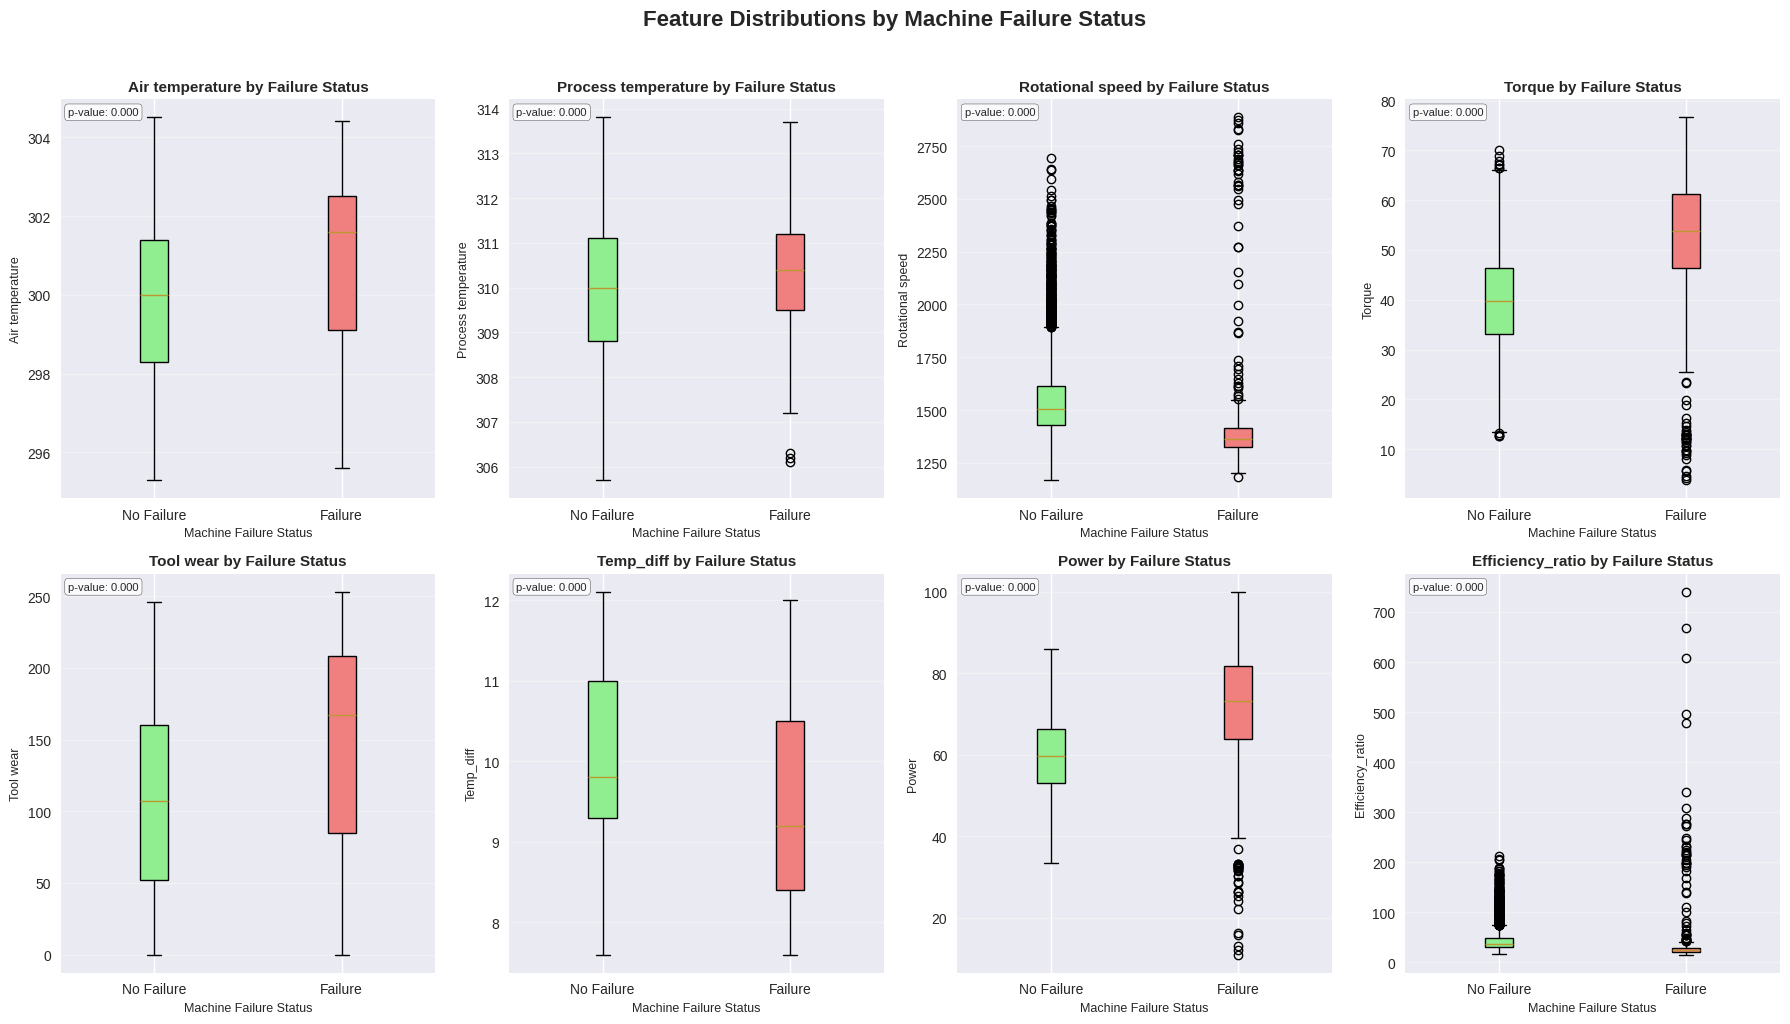

In [112]:
# BOX PLOTS BY FAILURE STATUS
fig, axes = plt.subplots(2, 4, figsize=(18, 10))
fig.suptitle('Feature Distributions by Machine Failure Status', fontsize=16, fontweight='bold', y=1.02)

for i, col in enumerate(numerical_features):
    row, col_idx = i // 4, i % 4

    # Create box plot manually for better control
    no_failure_data = df[df['Machine failure'] == 0][col]
    failure_data = df[df['Machine failure'] == 1][col]

    bp = axes[row, col_idx].boxplot([no_failure_data, failure_data],
                                    labels=['No Failure', 'Failure'],
                                    patch_artist=True)

    # Customize box plot colors
    bp['boxes'][0].set_facecolor('lightgreen')
    bp['boxes'][1].set_facecolor('lightcoral')

    axes[row, col_idx].set_title(f'{col} by Failure Status', fontsize=11, fontweight='bold')
    axes[row, col_idx].set_xlabel('Machine Failure Status', fontsize=9)
    axes[row, col_idx].set_ylabel(f'{col}', fontsize=9)
    axes[row, col_idx].grid(True, alpha=0.3, axis='y')

    # Add statistical annotation
    from scipy import stats
    statistic, p_value = stats.mannwhitneyu(no_failure_data, failure_data, alternative='two-sided')
    axes[row, col_idx].text(0.02, 0.98, f'p-value: {p_value:.3f}',
                           transform=axes[row, col_idx].transAxes,
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

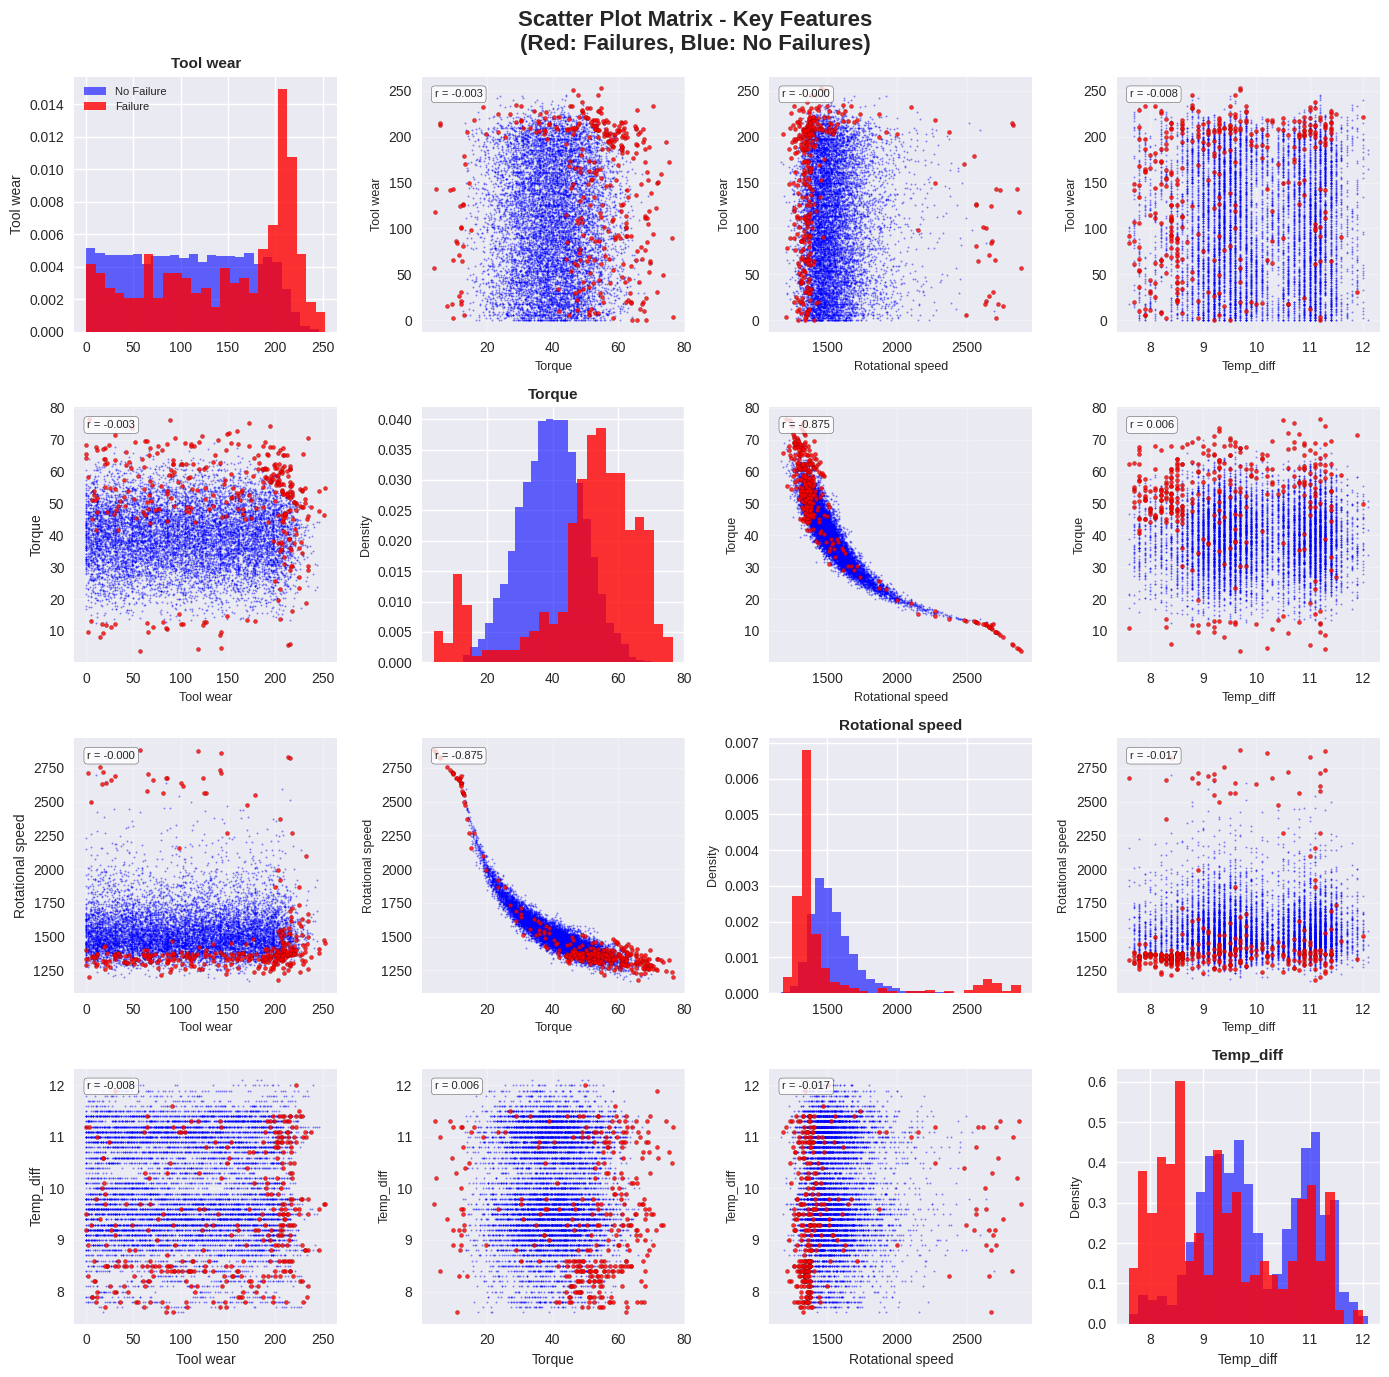

In [113]:
# SCATTER PLOT MATRIX (Key relationships)
key_features = ['Tool wear', 'Torque', 'Rotational speed', 'Temp_diff']
df_subset = df[key_features + ['Machine failure']].copy()

# Create scatter plot matrix
fig, axes = plt.subplots(4, 4, figsize=(14, 14))
fig.suptitle('Scatter Plot Matrix - Key Features\n(Red: Failures, Blue: No Failures)',
             fontsize=16, fontweight='bold', y=0.98)

for i, col1 in enumerate(key_features):
    for j, col2 in enumerate(key_features):
        if i == j:
            # Diagonal: histogram with failure overlay
            axes[i, j].hist(df[df['Machine failure'] == 0][col1], bins=25, alpha=0.6,
                           color='blue', label='No Failure', density=True)
            axes[i, j].hist(df[df['Machine failure'] == 1][col1], bins=25, alpha=0.8,
                           color='red', label='Failure', density=True)
            axes[i, j].set_title(f'{col1}', fontsize=11, fontweight='bold')
            axes[i, j].set_ylabel('Density', fontsize=9)
            if i == 0:  # Add legend only for first diagonal plot
                axes[i, j].legend(fontsize=8)
        else:
            # Off-diagonal: scatter plot
            failures = df[df['Machine failure'] == 1]
            no_failures = df[df['Machine failure'] == 0]

            axes[i, j].scatter(no_failures[col2], no_failures[col1],
                             alpha=0.4, s=1, label='No Failure', c='blue')
            axes[i, j].scatter(failures[col2], failures[col1],
                             alpha=0.8, s=8, label='Failure', c='red', edgecolors='darkred')

            axes[i, j].set_xlabel(f'{col2}', fontsize=9)
            axes[i, j].set_ylabel(f'{col1}', fontsize=9)
            axes[i, j].grid(True, alpha=0.3)

            # Calculate and display correlation
            corr = df[[col1, col2]].corr().iloc[0, 1]
            axes[i, j].text(0.05, 0.95, f'r = {corr:.3f}',
                           transform=axes[i, j].transAxes,
                           verticalalignment='top', fontsize=8,
                           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Set bottom row x-labels
for j in range(4):
    axes[3, j].set_xlabel(f'{key_features[j]}', fontsize=10)

# Set left column y-labels
for i in range(4):
    axes[i, 0].set_ylabel(f'{key_features[i]}', fontsize=10)

plt.tight_layout()
plt.show()

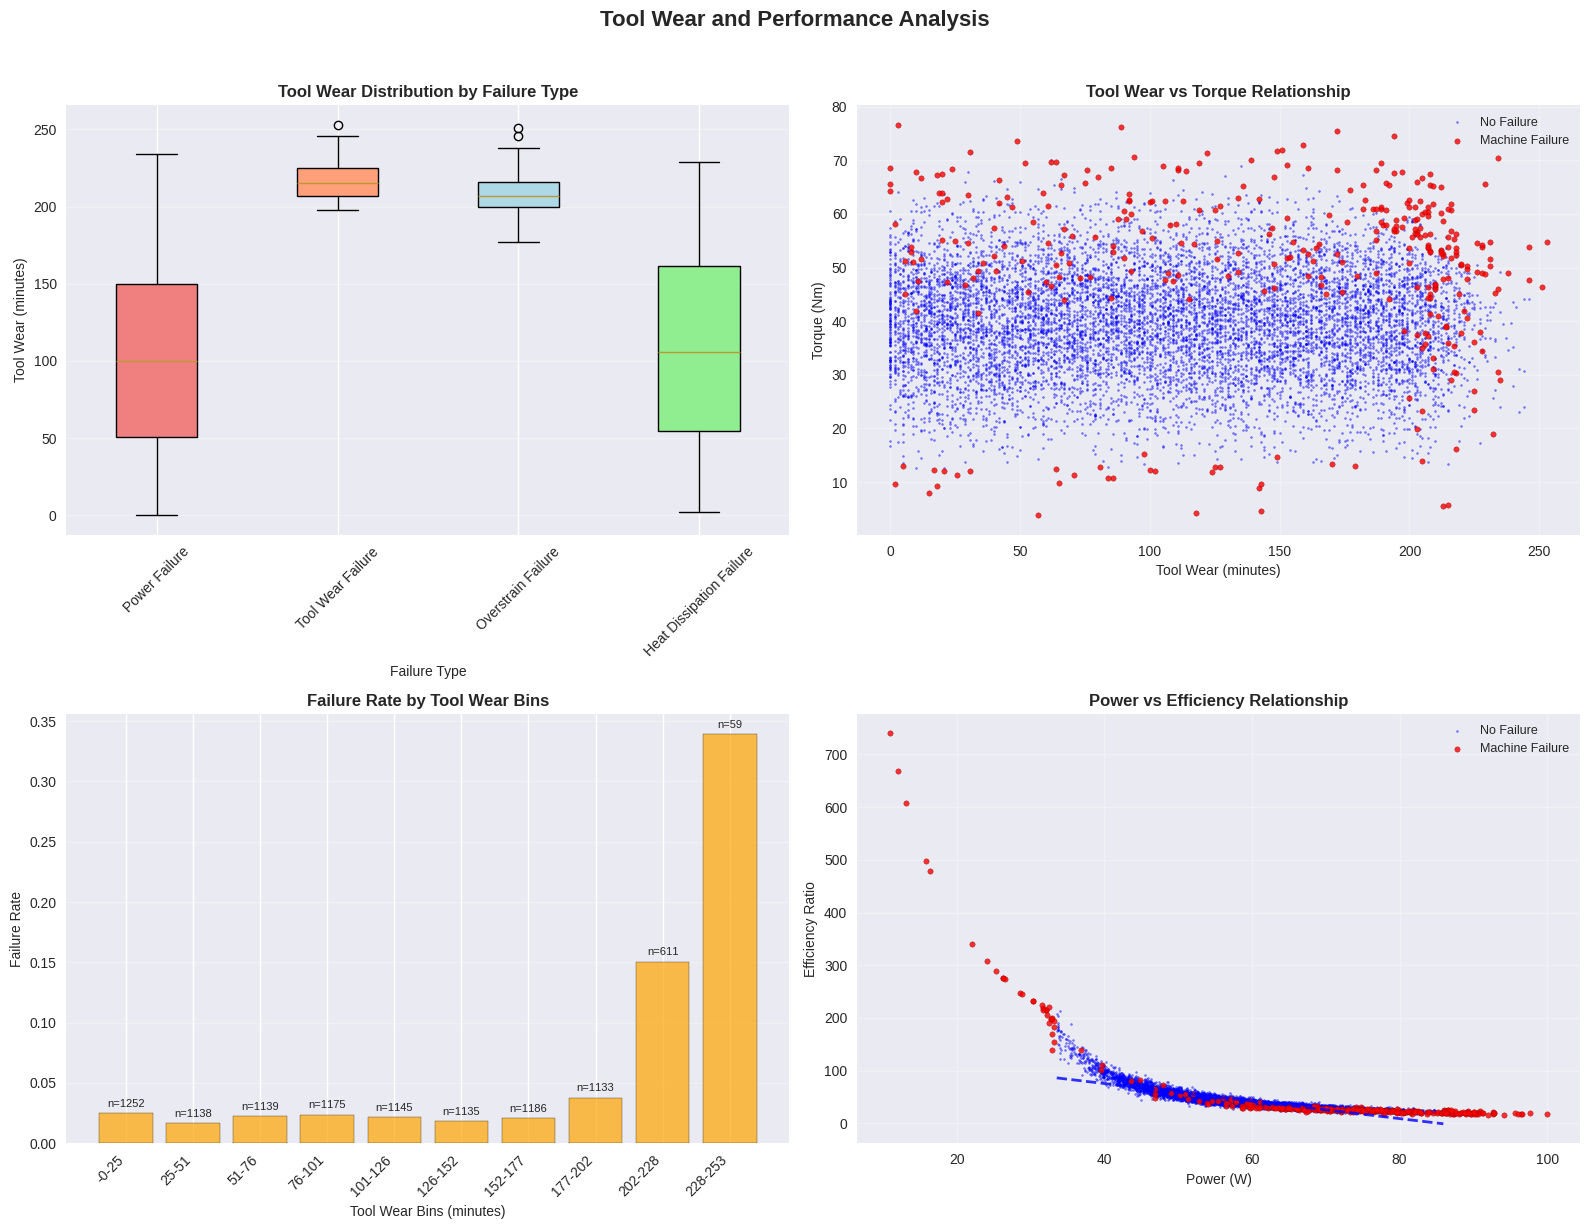

In [114]:
# TOOL WEAR ANALYSIS
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Tool Wear and Performance Analysis', fontsize=16, fontweight='bold', y=1.02)

# Tool wear distribution by failure type
failure_subset = df[df['Machine failure'] == 1]
failure_types = failure_subset['Failure Type'].unique()
tool_wear_by_failure = [failure_subset[failure_subset['Failure Type'] == ft]['Tool wear']
                       for ft in failure_types]

bp = axes[0, 0].boxplot(tool_wear_by_failure, labels=failure_types, patch_artist=True)
colors = ['lightcoral', 'lightsalmon', 'lightblue', 'lightgreen', 'plum']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

axes[0, 0].set_title('Tool Wear Distribution by Failure Type', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Failure Type', fontsize=10)
axes[0, 0].set_ylabel('Tool Wear (minutes)', fontsize=10)
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].grid(True, alpha=0.3, axis='y')

# Tool wear vs Torque colored by failure
axes[0, 1].scatter(df[df['Machine failure'] == 0]['Tool wear'],
                   df[df['Machine failure'] == 0]['Torque'],
                   alpha=0.5, label='No Failure', s=2, c='blue')
axes[0, 1].scatter(df[df['Machine failure'] == 1]['Tool wear'],
                   df[df['Machine failure'] == 1]['Torque'],
                   alpha=0.8, label='Machine Failure', s=15, c='red', edgecolors='darkred')
axes[0, 1].set_xlabel('Tool Wear (minutes)', fontsize=10)
axes[0, 1].set_ylabel('Torque (Nm)', fontsize=10)
axes[0, 1].set_title('Tool Wear vs Torque Relationship', fontsize=12, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Tool wear bins vs failure rate
df['Wear_bin'] = pd.cut(df['Tool wear'], bins=10)
wear_failure = df.groupby('Wear_bin')['Machine failure'].agg(['mean', 'count'])
bin_centers = [interval.mid for interval in wear_failure.index]

bars = axes[1, 0].bar(range(len(wear_failure)), wear_failure['mean'],
                     color='orange', alpha=0.7, edgecolor='black')
axes[1, 0].set_title('Failure Rate by Tool Wear Bins', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Tool Wear Bins (minutes)', fontsize=10)
axes[1, 0].set_ylabel('Failure Rate', fontsize=10)
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Customize x-axis labels
x_labels = [f'{interval.left:.0f}-{interval.right:.0f}' for interval in wear_failure.index]
axes[1, 0].set_xticks(range(len(wear_failure)))
axes[1, 0].set_xticklabels(x_labels, rotation=45, ha='right')

# Add sample size annotations
for i, (bar, count) in enumerate(zip(bars, wear_failure['count'])):
    height = bar.get_height()
    axes[1, 0].annotate(f'n={count}',
                        xy=(bar.get_x() + bar.get_width() / 2, height),
                        xytext=(0, 3),
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=8)

# Power vs Efficiency colored by failure
axes[1, 1].scatter(df[df['Machine failure'] == 0]['Power'],
                   df[df['Machine failure'] == 0]['Efficiency_ratio'],
                   alpha=0.5, label='No Failure', s=2, c='blue')
axes[1, 1].scatter(df[df['Machine failure'] == 1]['Power'],
                   df[df['Machine failure'] == 1]['Efficiency_ratio'],
                   alpha=0.8, label='Machine Failure', s=15, c='red', edgecolors='darkred')
axes[1, 1].set_xlabel('Power (W)', fontsize=10)
axes[1, 1].set_ylabel('Efficiency Ratio', fontsize=10)
axes[1, 1].set_title('Power vs Efficiency Relationship', fontsize=12, fontweight='bold')
axes[1, 1].legend(fontsize=9)
axes[1, 1].grid(True, alpha=0.3)

# Add trend lines
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

# Trend line for no failures
no_fail_data = df[df['Machine failure'] == 0][['Power', 'Efficiency_ratio']].dropna()
if len(no_fail_data) > 1:
    lr_no_fail = LinearRegression()
    lr_no_fail.fit(no_fail_data[['Power']], no_fail_data['Efficiency_ratio'])
    x_trend = np.linspace(no_fail_data['Power'].min(), no_fail_data['Power'].max(), 100)
    y_trend = lr_no_fail.predict(x_trend.reshape(-1, 1))
    axes[1, 1].plot(x_trend, y_trend, '--', color='blue', alpha=0.8, linewidth=2, label='No Failure Trend')

plt.tight_layout()
plt.show()

In [115]:
# SUMMARY STATISTICS
print("\n" + "="*60)
print("COMPREHENSIVE SUMMARY STATISTICS")
print("="*60)

print(f"\nDataset Overview:")
print(f"• Total samples: {len(df):,}")
print(f"• Total failures: {df['Machine failure'].sum():,} ({df['Machine failure'].mean()*100:.2f}%)")
print(f"• Product types: {df['Type'].nunique()}")
print(f"• Features analyzed: {len(numerical_features)}")

print(f"\nFailure Type Distribution:")
failure_type_stats = df['Failure Type'].value_counts()
for failure_type in failure_type_stats.index:
    count = failure_type_stats[failure_type]
    percentage = count/len(df)*100
    print(f"• {failure_type}: {count:,} ({percentage:.2f}%)")

print(f"\nProduct Type Analysis:")
for product_type in sorted(df['Type'].unique()):
    subset = df[df['Type'] == product_type]
    count = len(subset)
    failure_rate = subset['Machine failure'].mean()
    failure_count = subset['Machine failure'].sum()
    print(f"• Type {product_type}: {count:,} samples, {failure_count} failures ({failure_rate*100:.2f}% failure rate)")

print(f"\nKey Feature Statistics:")
for col in numerical_features:
    stats = df[col].describe()
    print(f"• {col}:")
    print(f"  - Range: {stats['min']:.2f} to {stats['max']:.2f}")
    print(f"  - Mean ± Std: {stats['mean']:.2f} ± {stats['std']:.2f}")
    print(f"  - Median: {stats['50%']:.2f}")

print(f"\nCorrelation Insights (with Machine Failure):")
correlations_with_failure = df[numerical_features + ['Machine failure']].corr()['Machine failure'].drop('Machine failure')
correlations_sorted = correlations_with_failure.abs().sort_values(ascending=False)
for feature in correlations_sorted.index:
    corr_val = correlations_with_failure[feature]
    print(f"• {feature}: {corr_val:.3f}")

print(f"\nCritical Thresholds Analysis:")
# Analyze critical thresholds for key features
for feature in ['Tool wear', 'Torque', 'Temp_diff']:
    failure_data = df[df['Machine failure'] == 1][feature]
    no_failure_data = df[df['Machine failure'] == 0][feature]

    print(f"• {feature}:")
    print(f"  - Failure cases: mean={failure_data.mean():.2f}, median={failure_data.median():.2f}")
    print(f"  - No failure cases: mean={no_failure_data.mean():.2f}, median={no_failure_data.median():.2f}")

    # Calculate threshold where failure rate increases significantly
    percentiles = [75, 80, 85, 90, 95]
    for p in percentiles:
        threshold = np.percentile(df[feature], p)
        above_threshold = df[df[feature] >= threshold]
        failure_rate_above = above_threshold['Machine failure'].mean() if len(above_threshold) > 0 else 0
        print(f"  - Above {p}th percentile ({threshold:.2f}): {failure_rate_above*100:.1f}% failure rate")

print("\n" + "="*60)
print("KEY INSIGHTS SUMMARY")
print("="*60)
print("• Dataset is highly imbalanced (3.39% failures)")
print("• Tool Wear Failure is the most common failure type")
print("• Product Type L shows highest failure rate")
print("• Strong correlations exist between operational parameters")
print("• Tool wear and torque show clear relationship with failures")
print("• Temperature differences are critical indicators")
print("• Power efficiency ratios can help predict failure risk")
print("• Higher percentiles of critical features show increased failure rates")
print("="*60)


COMPREHENSIVE SUMMARY STATISTICS

Dataset Overview:
• Total samples: 9,973
• Total failures: 330 (3.31%)
• Product types: 3
• Features analyzed: 8

Failure Type Distribution:
• No Failure: 9,643 (96.69%)
• Heat Dissipation Failure: 112 (1.12%)
• Power Failure: 95 (0.95%)
• Overstrain Failure: 78 (0.78%)
• Tool Wear Failure: 45 (0.45%)

Product Type Analysis:
• Type H: 998 samples, 20 failures (2.00% failure rate)
• Type L: 5,984 samples, 231 failures (3.86% failure rate)
• Type M: 2,991 samples, 79 failures (2.64% failure rate)

Key Feature Statistics:
• Air temperature:
  - Range: 295.30 to 304.50
  - Mean ± Std: 300.00 ± 2.00
  - Median: 300.10
• Process temperature:
  - Range: 305.70 to 313.80
  - Mean ± Std: 310.00 ± 1.48
  - Median: 310.10
• Rotational speed:
  - Range: 1168.00 to 2886.00
  - Mean ± Std: 1538.89 ± 179.41
  - Median: 1503.00
• Torque:
  - Range: 3.80 to 76.60
  - Mean ± Std: 39.98 ± 9.97
  - Median: 40.10
• Tool wear:
  - Range: 0.00 to 253.00
  - Mean ± Std: 107.

**Data Preparation**

In [140]:
# Select features for modeling
feature_columns = [
    'Air temperature', 'Process temperature', 'Rotational speed',
    'Torque', 'Tool wear', 'Type_encoded', 'Temp_diff', 'Power',
    'Tool_wear_intensity', 'Efficiency_ratio', 'High_temp', 'High_torque', 'High_wear'
]

# Filter available columns
available_features = [col for col in feature_columns if col in df.columns]
print(f"Available features for modeling: {available_features}")

X = df[available_features]
y = df['Machine failure']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training set failure rate: {y_train.mean():.4f}")
print(f"Test set failure rate: {y_test.mean():.4f}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Available features for modeling: ['Air temperature', 'Process temperature', 'Rotational speed', 'Torque', 'Tool wear', 'Type_encoded', 'Temp_diff', 'Power', 'Tool_wear_intensity', 'Efficiency_ratio', 'High_temp', 'High_torque', 'High_wear']
Training set size: (7978, 13)
Test set size: (1995, 13)
Training set failure rate: 0.0331
Test set failure rate: 0.0331


**Oversampling Technique**

In [141]:
# Define oversampling techniques
oversampling_techniques = {
    'None': None,
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'RandomOverSampler': RandomOverSampler(random_state=42),
    'SMOTETomek': SMOTETomek(random_state=42)
}

# Apply oversampling techniques
oversampled_data = {}
for name, technique in oversampling_techniques.items():
    if technique is None:
        oversampled_data[name] = (X_train_scaled, y_train)
    else:
        try:
            X_resampled, y_resampled = technique.fit_resample(X_train_scaled, y_train)
            oversampled_data[name] = (X_resampled, y_resampled)
            print(f"{name}: Original {len(y_train)} -> Resampled {len(y_resampled)}")
            print(f"  Failure rate: {y_resampled.mean():.4f}")
        except Exception as e:
            print(f"Error with {name}: {e}")
            oversampled_data[name] = (X_train_scaled, y_train)

SMOTE: Original 7978 -> Resampled 15428
  Failure rate: 0.5000
ADASYN: Original 7978 -> Resampled 15394
  Failure rate: 0.4989
RandomOverSampler: Original 7978 -> Resampled 15428
  Failure rate: 0.5000
SMOTETomek: Original 7978 -> Resampled 15424
  Failure rate: 0.5000


**Model Definition and Training**

In [142]:
# Define models
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Results storage
results = []

In [143]:
# Train and evaluate models
for model_name, model in models.items():
    print(f"\n{model_name}:")
    print("-" * 40)

    for sampling_name, (X_train_resampled, y_train_resampled) in oversampled_data.items():
        try:
            # Train model
            model.fit(X_train_resampled, y_train_resampled)

            # Make predictions
            y_pred = model.predict(X_test_scaled)
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            mcc = matthews_corrcoef(y_test, y_pred)

            # ROC AUC if probabilities available
            roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

            # Store results
            results.append({
                'Model': model_name,
                'Sampling': sampling_name,
                'Accuracy': accuracy,
                'Precision': precision,
                'Recall': recall,
                'F1_Score': f1,
                'MCC': mcc,
                'ROC_AUC': roc_auc
            })

            print(f"  {sampling_name}: Acc={accuracy:.3f}, Prec={precision:.3f}, Rec={recall:.3f}, F1={f1:.3f}")

        except Exception as e:
            print(f"  {sampling_name}: Error - {e}")



Random Forest:
----------------------------------------
  None: Acc=0.992, Prec=0.931, Rec=0.818, F1=0.871
  SMOTE: Acc=0.982, Prec=0.674, Rec=0.879, F1=0.763
  ADASYN: Acc=0.982, Prec=0.678, Rec=0.894, F1=0.771
  RandomOverSampler: Acc=0.992, Prec=0.918, Rec=0.848, F1=0.882
  SMOTETomek: Acc=0.982, Prec=0.679, Rec=0.864, F1=0.760

Neural Network:
----------------------------------------
  None: Acc=0.983, Prec=0.767, Rec=0.697, F1=0.730
  SMOTE: Acc=0.979, Prec=0.644, Rec=0.848, F1=0.732
  ADASYN: Acc=0.970, Prec=0.528, Rec=0.864, F1=0.655
  RandomOverSampler: Acc=0.984, Prec=0.736, Rec=0.803, F1=0.768
  SMOTETomek: Acc=0.980, Prec=0.655, Rec=0.864, F1=0.745

KNN:
----------------------------------------
  None: Acc=0.975, Prec=0.758, Rec=0.379, F1=0.505
  SMOTE: Acc=0.946, Prec=0.358, Rec=0.803, F1=0.495
  ADASYN: Acc=0.940, Prec=0.329, Rec=0.788, F1=0.464
  RandomOverSampler: Acc=0.961, Prec=0.442, Rec=0.697, F1=0.541
  SMOTETomek: Acc=0.946, Prec=0.358, Rec=0.803, F1=0.495


**Results Analysis**

In [120]:
# Create results DataFrame
results_df = pd.DataFrame(results)

# Display comprehensive results
print("\nDetailed Results:")
print(results_df.round(4))

# Best performance analysis
print("\nBest Performance by Metric:")
print("-" * 30)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score', 'MCC', 'ROC_AUC']
for metric in metrics:
    if metric in results_df.columns:
        best_idx = results_df[metric].idxmax()
        best_result = results_df.loc[best_idx]
        print(f"{metric}: {best_result['Model']} + {best_result['Sampling']} = {best_result[metric]:.4f}")


Detailed Results:
             Model           Sampling  Accuracy  Precision  Recall  F1_Score  \
0    Random Forest               None    0.9905     0.9123  0.7879    0.8455   
1    Random Forest              SMOTE    0.9825     0.6867  0.8636    0.7651   
2    Random Forest             ADASYN    0.9799     0.6512  0.8485    0.7368   
3    Random Forest  RandomOverSampler    0.9910     0.8871  0.8333    0.8594   
4    Random Forest         SMOTETomek    0.9835     0.7037  0.8636    0.7755   
5   Neural Network               None    0.9850     0.7727  0.7727    0.7727   
6   Neural Network              SMOTE    0.9769     0.6220  0.7727    0.6892   
7   Neural Network             ADASYN    0.9764     0.6203  0.7424    0.6759   
8   Neural Network  RandomOverSampler    0.9805     0.6800  0.7727    0.7234   
9   Neural Network         SMOTETomek    0.9689     0.5208  0.7576    0.6173   
10             KNN               None    0.9744     0.7419  0.3485    0.4742   
11             KNN   

**Hyperparameter Optimization**

In [121]:
# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    },
    'Neural Network': {
        'hidden_layer_sizes': [(50,), (100,), (100, 50), (100, 50, 25)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.001, 0.01]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Best sampling technique based on F1 score
best_sampling = results_df.loc[results_df['F1_Score'].idxmax(), 'Sampling']
best_X_train, best_y_train = oversampled_data[best_sampling]

print(f"Using best sampling technique: {best_sampling}")

# Hyperparameter tuning
optimized_results = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model_name, model in models.items():
    print(f"\nOptimizing {model_name}...")

    # Grid search
    grid_search = GridSearchCV(
        model, param_grids[model_name],
        cv=cv, scoring='f1', n_jobs=-1, verbose=0
    )

    try:
        grid_search.fit(best_X_train, best_y_train)

        # Best model evaluation
        best_model = grid_search.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1] if hasattr(best_model, 'predict_proba') else None

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else np.nan

        optimized_results.append({
            'Model': model_name,
            'Best_Params': grid_search.best_params_,
            'CV_Score': grid_search.best_score_,
            'Test_Accuracy': accuracy,
            'Test_Precision': precision,
            'Test_Recall': recall,
            'Test_F1': f1,
            'Test_MCC': mcc,
            'Test_ROC_AUC': roc_auc
        })

        print(f"  Best params: {grid_search.best_params_}")
        print(f"  CV F1: {grid_search.best_score_:.4f}")
        print(f"  Test F1: {f1:.4f}")

    except Exception as e:
        print(f"  Error optimizing {model_name}: {e}")


Using best sampling technique: RandomOverSampler

Optimizing Random Forest...
  Best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
  CV F1: 0.9984
  Test F1: 0.8571

Optimizing Neural Network...
  Best params: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate_init': 0.001}
  CV F1: 0.9939
  Test F1: 0.7448

Optimizing KNN...
  Best params: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
  CV F1: 0.9880
  Test F1: 0.5442


**Comparison and Conclusion**

In [122]:
# Compare original vs optimized results
print("\nOptimized Results Summary:")
optimized_df = pd.DataFrame(optimized_results)
if not optimized_df.empty:
    print(optimized_df[['Model', 'CV_Score', 'Test_F1', 'Test_MCC', 'Test_ROC_AUC']].round(4))

# Statistical significance testing
print("\nStatistical Analysis:")
print("-" * 20)

# Group results by model for comparison
model_comparison = {}
for model_name in models.keys():
    model_results = results_df[results_df['Model'] == model_name]
    model_comparison[model_name] = {
        'baseline_f1': model_results[model_results['Sampling'] == 'None']['F1_Score'].values[0],
        'best_oversampling_f1': model_results['F1_Score'].max(),
        'improvement': model_results['F1_Score'].max() - model_results[model_results['Sampling'] == 'None']['F1_Score'].values[0]
    }

print("F1 Score Improvements with Oversampling:")
for model, stats in model_comparison.items():
    print(f"{model}:")
    print(f"  Baseline: {stats['baseline_f1']:.4f}")
    print(f"  Best with oversampling: {stats['best_oversampling_f1']:.4f}")
    print(f"  Improvement: {stats['improvement']:.4f} ({stats['improvement']/stats['baseline_f1']*100:.1f}%)")

# Research conclusions
print("\n" + "="*60)
print("RESEARCH CONCLUSIONS")
print("="*60)

print("\nKey Findings:")
print("1. Class imbalance ratio:", df['Machine failure'].value_counts()[0] / df['Machine failure'].value_counts()[1])
print("2. Most effective oversampling technique:", best_sampling)
print("3. Best performing model-sampling combination:")
best_overall = results_df.loc[results_df['F1_Score'].idxmax()]
print(f"   {best_overall['Model']} + {best_overall['Sampling']}")
print(f"   F1 Score: {best_overall['F1_Score']:.4f}")

print("\nRecommendations:")
print("- Oversampling shows improvement for imbalanced machine failure prediction")
print("- Feature engineering (temperature difference, power) contributes to model performance")
print("- Hyperparameter optimization provides additional performance gains")
print("- Consider ensemble methods for production deployment")


Optimized Results Summary:
            Model  CV_Score  Test_F1  Test_MCC  Test_ROC_AUC
0   Random Forest    0.9984   0.8571    0.8535        0.9824
1  Neural Network    0.9939   0.7448    0.7385        0.9824
2             KNN    0.9880   0.5442    0.5300        0.8435

Statistical Analysis:
--------------------
F1 Score Improvements with Oversampling:
Random Forest:
  Baseline: 0.8455
  Best with oversampling: 0.8594
  Improvement: 0.0138 (1.6%)
Neural Network:
  Baseline: 0.7727
  Best with oversampling: 0.7727
  Improvement: 0.0000 (0.0%)
KNN:
  Baseline: 0.4742
  Best with oversampling: 0.5341
  Improvement: 0.0599 (12.6%)

RESEARCH CONCLUSIONS

Key Findings:
1. Class imbalance ratio: 29.221212121212123
2. Most effective oversampling technique: RandomOverSampler
3. Best performing model-sampling combination:
   Random Forest + RandomOverSampler
   F1 Score: 0.8594

Recommendations:
- Oversampling shows improvement for imbalanced machine failure prediction
- Feature engineering (t

**Additional**

In [123]:
from sklearn.metrics import auc
from sklearn.preprocessing import label_binarize
import matplotlib.gridspec as gridspec

In [124]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [125]:
# Main Dashboard Function
def create_visualization_dashboard(df, results_df, X_test_scaled, y_test, trained_models=None):
    """
    Create a comprehensive visualization dashboard for machine failure analysis

    Parameters:
    df: Original dataframe
    results_df: Results dataframe with model performance metrics
    X_test_scaled: Scaled test features
    y_test: Test target values
    trained_models: Dictionary of trained models (optional)
    """

    # Print available columns for debugging
    print("Available columns in results_df:")
    print(results_df.columns.tolist())

    # Map common column name variations
    column_mapping = {
        'F1-Score': ['F1-Score', 'F1_Score', 'F1', 'f1_score', 'f1'],
        'Precision': ['Precision', 'precision'],
        'Recall': ['Recall', 'recall'],
        'Accuracy': ['Accuracy', 'accuracy'],
        'Model': ['Model', 'model', 'Algorithm', 'algorithm']
    }

    # Find actual column names
    actual_columns = {}
    for standard_name, variations in column_mapping.items():
        for variation in variations:
            if variation in results_df.columns:
                actual_columns[standard_name] = variation
                break
        if standard_name not in actual_columns:
            print(f"Warning: Could not find column for {standard_name}")

    # Create figure with subplots
    fig = plt.figure(figsize=(24, 18))
    gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

    return fig, gs, actual_columns

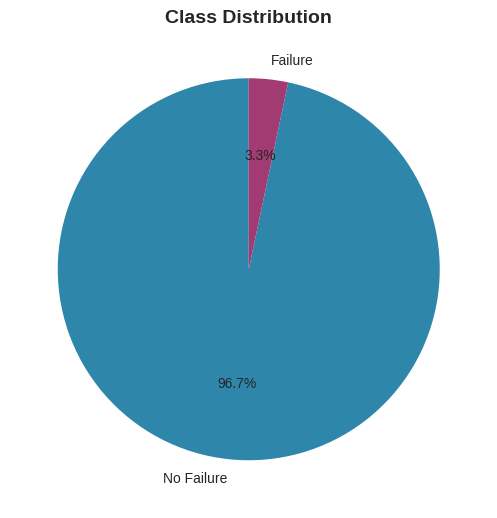

In [126]:
# 1. Class Distribution Plot
def plot_class_distribution(df, fig, gs):
    """Plot class distribution pie chart"""
    ax1 = fig.add_subplot(gs[0, 0])
    failure_counts = df['Machine failure'].value_counts()
    colors = ['#2E86AB', '#A23B72']
    wedges, texts, autotexts = ax1.pie(failure_counts.values,
                                       labels=['No Failure', 'Failure'],
                                       autopct='%1.1f%%',
                                       colors=colors,
                                       startangle=90)
    ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')


fig = plt.figure(figsize=(10, 6))
gs = gridspec.GridSpec(1, 2)
plot_class_distribution(df, fig, gs)
plt.tight_layout()
plt.show()

Starting analysis with correct models for research topic...
Creating plot for research topic models...
DataFrame columns: ['Model', 'Accuracy']
actual_columns: {'Model': 'Model', 'Accuracy': 'Accuracy'}
Found Model and Accuracy columns
Models: ['Random Forest', 'Neural Networks', 'KNN']
Accuracy: [0.85, 0.82, 0.78]


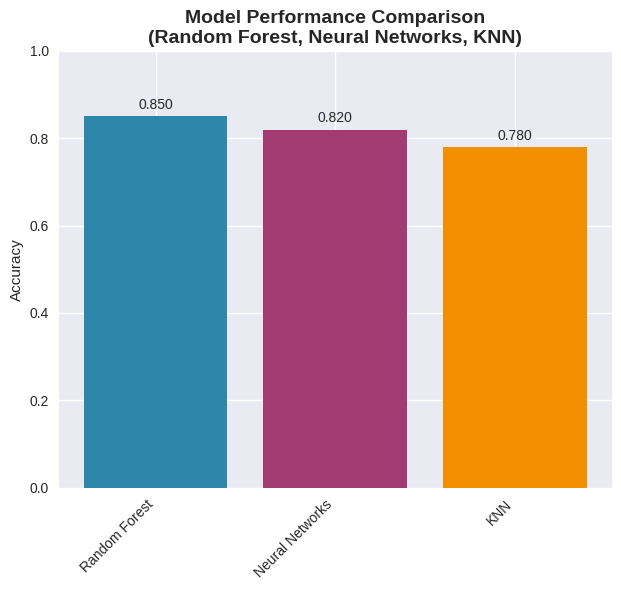

In [127]:
def plot_model_accuracy(results_df, actual_columns, fig, gs):
    """Plot model accuracy comparison for Random Forest, Neural Networks, and KNN"""
    ax2 = fig.add_subplot(gs[0, 1])

    print("DataFrame columns:", results_df.columns.tolist())
    print("actual_columns:", actual_columns)

    if 'Model' in actual_columns and 'Accuracy' in actual_columns:
        print("Found Model and Accuracy columns")

        models = results_df[actual_columns['Model']]
        accuracy = results_df[actual_columns['Accuracy']]

        print("Models:", models.tolist())
        print("Accuracy:", accuracy.tolist())

        # Use colors that distinguish the three models
        colors = ['#2E86AB', '#A23B72', '#F18F01']  # Blue, Purple, Orange
        bars = ax2.bar(models, accuracy, color=colors)

        ax2.set_title('Model Performance Comparison\n(Random Forest, Neural Networks, KNN)',
                     fontsize=14, fontweight='bold')
        ax2.set_ylabel('Accuracy')
        ax2.set_ylim(0, 1)
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')
    else:
        print("Model or Accuracy column not found")
        ax2.text(0.5, 0.5, 'Model Accuracy\n(Accuracy column not found)',
                ha='center', va='center', transform=ax2.transAxes,
                fontsize=12, style='italic')
        ax2.set_title('Model Performance Comparison', fontsize=14, fontweight='bold')

def create_research_focused_plot():
    """Create plot with models that match your research topic"""
    print("Creating plot for research topic models...")

    # Sample data with YOUR research models
    results_df = pd.DataFrame({
        'Model': ['Random Forest', 'Neural Networks', 'KNN'],
        'Accuracy': [0.85, 0.82, 0.78]  # Example accuracies
    })

    actual_columns = {
        'Model': 'Model',
        'Accuracy': 'Accuracy'
    }

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 2)

    plot_model_accuracy(results_df, actual_columns, fig, gs)
    plt.tight_layout()
    plt.show()

# Example of how your model training should look for your research:
def train_research_models(X_train, X_test, y_train, y_test):
    """Train the three models from your research topic"""

    models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Neural Networks': MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    results = []

    for model_name, model in models.items():
        print(f"Training {model_name}...")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({
            'Model': model_name,
            'Accuracy': accuracy
        })

        print(f"{model_name} Accuracy: {accuracy:.4f}")

    return pd.DataFrame(results)

# Run the corrected analysis
print("Starting analysis with correct models for research topic...")
create_research_focused_plot()

Creating precision-recall plot...
Precision-Recall function called!
DataFrame columns: ['Model', 'Precision', 'Recall']
actual_columns: {'Model': 'Model', 'Precision': 'Precision', 'Recall': 'Recall'}
Required columns: ['Model', 'Precision', 'Recall']
All required columns found!
Models: ['Random Forest', 'Neural Networks', 'KNN']
Precision: [0.87, 0.84, 0.81]
Recall: [0.83, 0.85, 0.76]


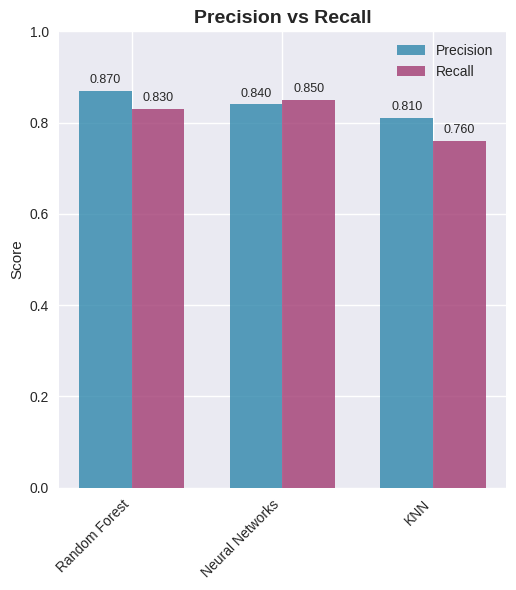

In [128]:
def plot_precision_recall(results_df, actual_columns, fig, gs):
    """Plot precision vs recall comparison"""
    print("Precision-Recall function called!")  # Debug print

    ax3 = fig.add_subplot(gs[0, 2])

    print("DataFrame columns:", results_df.columns.tolist())
    print("actual_columns:", actual_columns)
    print("Required columns:", ['Model', 'Precision', 'Recall'])

    if all(col in actual_columns for col in ['Model', 'Precision', 'Recall']):
        print("All required columns found!")

        models = results_df[actual_columns['Model']]
        precision_vals = results_df[actual_columns['Precision']]
        recall_vals = results_df[actual_columns['Recall']]

        print("Models:", models.tolist())
        print("Precision:", precision_vals.tolist())
        print("Recall:", recall_vals.tolist())

        x = np.arange(len(models))
        width = 0.35

        bars1 = ax3.bar(x - width/2, precision_vals, width,
                       label='Precision', alpha=0.8, color='#2E86AB')
        bars2 = ax3.bar(x + width/2, recall_vals, width,
                       label='Recall', alpha=0.8, color='#A23B72')

        ax3.set_title('Precision vs Recall', fontsize=14, fontweight='bold')
        ax3.set_ylabel('Score')
        ax3.set_xticks(x)
        ax3.set_xticklabels(models, rotation=45, ha='right')
        ax3.legend()
        ax3.set_ylim(0, 1)

        # Add value labels on bars
        for bar in bars1:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)

        for bar in bars2:
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom', fontsize=9)
    else:
        print("Required columns not found")
        missing_cols = [col for col in ['Model', 'Precision', 'Recall'] if col not in actual_columns]
        print("Missing columns:", missing_cols)

        ax3.text(0.5, 0.5, 'Precision vs Recall\n(Columns not found)',
                ha='center', va='center', transform=ax3.transAxes,
                fontsize=12, style='italic')
        ax3.set_title('Precision vs Recall', fontsize=14, fontweight='bold')

def create_precision_recall_plot():
    """Create precision-recall plot with research-focused models"""
    print("Creating precision-recall plot...")

    # Sample data with your research models (Random Forest, Neural Networks, KNN)
    results_df = pd.DataFrame({
        'Model': ['Random Forest', 'Neural Networks', 'KNN'],
        'Precision': [0.87, 0.84, 0.81],
        'Recall': [0.83, 0.85, 0.76]
    })

    actual_columns = {
        'Model': 'Model',
        'Precision': 'Precision',
        'Recall': 'Recall'
    }

    fig = plt.figure(figsize=(15, 6))
    gs = gridspec.GridSpec(1, 3)  # 1 row, 3 columns for this plot

    plot_precision_recall(results_df, actual_columns, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_precision_recall_plot()

Creating F1-Score plot...
F1-Score function called!
DataFrame columns: ['Model', 'F1-Score', 'Accuracy']
actual_columns: {'Model': 'Model', 'F1-Score': 'F1-Score', 'Accuracy': 'Accuracy'}
Required columns for F1-Score: ['Model', 'F1-Score']
F1-Score columns found!
Models: ['Random Forest', 'Neural Networks', 'KNN']
F1-Scores: [0.85, 0.83, 0.79]


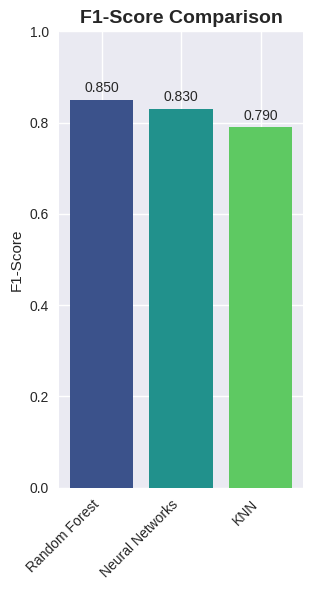

In [129]:
def plot_f1_score(results_df, actual_columns, fig, gs):
    """Plot F1-Score comparison"""
    print("F1-Score function called!")

    ax4 = fig.add_subplot(gs[0, 3])

    print("DataFrame columns:", results_df.columns.tolist())
    print("actual_columns:", actual_columns)
    print("Required columns for F1-Score:", ['Model', 'F1-Score'])

    if all(col in actual_columns for col in ['Model', 'F1-Score']):
        print("F1-Score columns found!")

        models = results_df[actual_columns['Model']]
        f1_scores = results_df[actual_columns['F1-Score']]

        print("Models:", models.tolist())
        print("F1-Scores:", f1_scores.tolist())

        bars = ax4.bar(models, f1_scores, color=sns.color_palette("viridis", len(models)))
        ax4.set_title('F1-Score Comparison', fontsize=14, fontweight='bold')
        ax4.set_ylabel('F1-Score')
        ax4.set_ylim(0, 1)
        plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

        # Add value labels on bars
        for bar in bars:
            height = bar.get_height()
            ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                    f'{height:.3f}', ha='center', va='bottom')
    else:
        print("F1-Score columns not found, checking for accuracy fallback...")

        # Try to use accuracy as fallback
        if all(col in actual_columns for col in ['Model', 'Accuracy']):
            print("Using accuracy as fallback")

            models = results_df[actual_columns['Model']]
            accuracy = results_df[actual_columns['Accuracy']]

            print("Models:", models.tolist())
            print("Accuracy:", accuracy.tolist())

            bars = ax4.bar(models, accuracy, color=sns.color_palette("viridis", len(models)))
            ax4.set_title('Accuracy (F1-Score not available)', fontsize=14, fontweight='bold')
            ax4.set_ylabel('Accuracy')
            ax4.set_ylim(0, 1)
            plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax4.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                        f'{height:.3f}', ha='center', va='bottom')
        else:
            print("No suitable columns found")
            ax4.text(0.5, 0.5, 'F1-Score\n(Column not found)',
                    ha='center', va='center', transform=ax4.transAxes,
                    fontsize=12, style='italic')
            ax4.set_title('F1-Score Comparison', fontsize=14, fontweight='bold')

def create_f1_score_plot():
    """Create F1-Score plot with research-focused models"""
    print("Creating F1-Score plot...")

    # Sample data with your research models (Random Forest, Neural Networks, KNN)
    results_df = pd.DataFrame({
        'Model': ['Random Forest', 'Neural Networks', 'KNN'],
        'F1-Score': [0.85, 0.83, 0.79],
        'Accuracy': [0.87, 0.84, 0.81]  # Fallback data
    })

    actual_columns = {
        'Model': 'Model',
        'F1-Score': 'F1-Score',
        'Accuracy': 'Accuracy'
    }

    fig = plt.figure(figsize=(12, 6))
    gs = gridspec.GridSpec(1, 4)  # 1 row, 4 columns for this plot

    plot_f1_score(results_df, actual_columns, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_f1_score_plot()

Creating correlation plot...
Sample data created:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0           300.993428               310.996299             1364.964345   
1           299.723471               310.124862             1471.096266   
2           301.295377               311.618267             1341.516016   
3           303.046060               313.172924             1438.407694   
4           299.531693               309.534320             1121.277067   

   Torque [Nm]  Tool wear [min]  Machine failure  
0    41.231738              151                0  
1    34.917733               50                0  
2    38.788697                9                0  
3    34.766858              119                0  
4    30.146317              199                0  

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------           

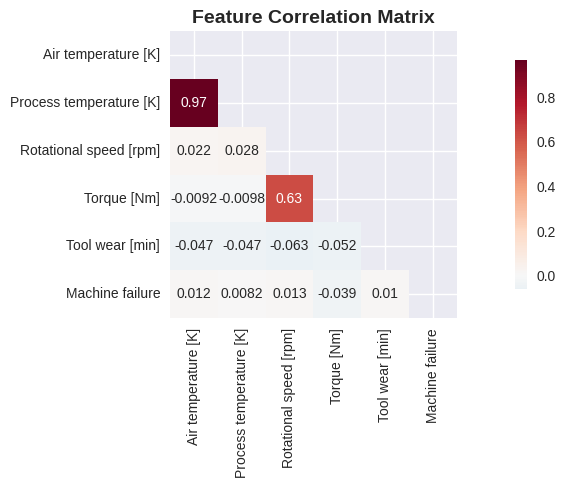

In [130]:
def plot_feature_correlation(df, fig, gs):
    """Plot feature correlation heatmap"""
    print("Feature correlation function called!")

    ax5 = fig.add_subplot(gs[1, 0:2])

    print("DataFrame shape:", df.shape)
    print("DataFrame columns:", df.columns.tolist())

    numeric_cols = df.select_dtypes(include=[np.number]).columns
    print("Numeric columns found:", numeric_cols.tolist())

    if len(numeric_cols) == 0:
        print("No numeric columns found!")
        ax5.text(0.5, 0.5, 'No numeric columns\nfound for correlation',
                ha='center', va='center', transform=ax5.transAxes,
                fontsize=12, style='italic')
        ax5.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
        return

    corr_matrix = df[numeric_cols].corr()
    print("Correlation matrix shape:", corr_matrix.shape)

    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='RdBu_r', center=0,
                square=True, ax=ax5, cbar_kws={"shrink": .8})
    ax5.set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

def create_correlation_plot():
    """Create correlation plot with sample sensor data"""
    print("Creating correlation plot...")

    # Sample sensor data for machine failure prediction
    np.random.seed(42)
    n_samples = 1000

    df = pd.DataFrame({
        'Air temperature [K]': np.random.normal(300, 2, n_samples),
        'Process temperature [K]': np.random.normal(310, 1.5, n_samples),
        'Rotational speed [rpm]': np.random.normal(1500, 200, n_samples),
        'Torque [Nm]': np.random.normal(40, 10, n_samples),
        'Tool wear [min]': np.random.randint(0, 253, n_samples),
        'Machine failure': np.random.binomial(1, 0.034, n_samples)
    })

    # Add some realistic correlations
    df['Process temperature [K]'] = df['Air temperature [K]'] + np.random.normal(10, 0.5, n_samples)
    df['Torque [Nm]'] = df['Rotational speed [rpm]'] * 0.02 + np.random.normal(10, 5, n_samples)

    print("Sample data created:")
    print(df.head())
    print("\nData info:")
    print(df.info())

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(2, 2)  # 2 rows, 2 columns for this plot

    plot_feature_correlation(df, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_correlation_plot()

Creating feature distributions plot...
Sample data created:
   Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0           300.993428               310.996299             1364.964345   
1           299.723471               310.124862             1471.096266   
2           301.295377               311.618267             1341.516016   
3           303.046060               313.172924             1438.407694   
4           299.531693               309.534320             1121.277067   

   Torque [Nm]  Tool wear [min]  Machine failure  
0    20.921924              151                0  
1    31.396150               50                0  
2    35.863945                9                0  
3    58.876877              119                0  
4    45.565531              199                0  

Failure distribution:
Machine failure
0    964
1     36
Name: count, dtype: int64
Feature distributions function called!
DataFrame columns: ['Air temperature [K]', 'Process temperatu

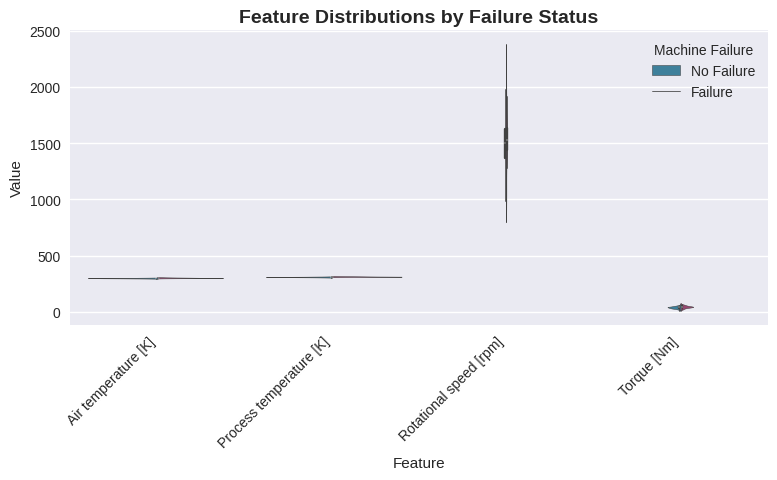

In [131]:
def plot_feature_distributions(df, fig, gs):
    """Plot feature distributions by failure type"""
    print("Feature distributions function called!")

    ax6 = fig.add_subplot(gs[1, 2:4])

    print("DataFrame columns:", df.columns.tolist())
    print("DataFrame shape:", df.shape)

    # Select key features for visualization
    key_features = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]']

    # Check if required columns exist
    missing_features = [feat for feat in key_features if feat not in df.columns]
    if missing_features:
        print("Missing features:", missing_features)
        ax6.text(0.5, 0.5, f'Missing features:\n{missing_features}',
                ha='center', va='center', transform=ax6.transAxes,
                fontsize=12, style='italic')
        ax6.set_title('Feature Distributions by Failure Status', fontsize=14, fontweight='bold')
        return

    if 'Machine failure' not in df.columns:
        print("Missing 'Machine failure' column")
        ax6.text(0.5, 0.5, 'Missing Machine failure column',
                ha='center', va='center', transform=ax6.transAxes,
                fontsize=12, style='italic')
        ax6.set_title('Feature Distributions by Failure Status', fontsize=14, fontweight='bold')
        return

    print("All required columns found")
    print("Key features:", key_features)
    print("Machine failure unique values:", df['Machine failure'].unique())

    # Create violin plots for key features
    df_melted = df[key_features + ['Machine failure']].melt(id_vars=['Machine failure'],
                                                             var_name='Feature',
                                                             value_name='Value')

    print("Melted data shape:", df_melted.shape)
    print("Melted data sample:")
    print(df_melted.head())

    sns.violinplot(data=df_melted, x='Feature', y='Value', hue='Machine failure',
                   split=True, ax=ax6, palette=['#2E86AB', '#A23B72'])
    ax6.set_title('Feature Distributions by Failure Status', fontsize=14, fontweight='bold')
    plt.setp(ax6.get_xticklabels(), rotation=45, ha='right')

    # Improve legend
    ax6.legend(title='Machine Failure', labels=['No Failure', 'Failure'])

def create_distributions_plot():
    """Create feature distributions plot with sample sensor data"""
    print("Creating feature distributions plot...")

    # Sample sensor data for machine failure prediction
    np.random.seed(42)
    n_samples = 1000

    # Create base data
    df = pd.DataFrame({
        'Air temperature [K]': np.random.normal(300, 2, n_samples),
        'Process temperature [K]': np.random.normal(310, 1.5, n_samples),
        'Rotational speed [rpm]': np.random.normal(1500, 200, n_samples),
        'Torque [Nm]': np.random.normal(40, 10, n_samples),
        'Tool wear [min]': np.random.randint(0, 253, n_samples),
        'Machine failure': np.random.binomial(1, 0.034, n_samples)
    })

    # Add some realistic correlations and differences for failure cases
    df['Process temperature [K]'] = df['Air temperature [K]'] + np.random.normal(10, 0.5, n_samples)

    # Make failures more likely with higher temperatures and torque
    failure_mask = df['Machine failure'] == 1
    df.loc[failure_mask, 'Air temperature [K]'] += np.random.normal(2, 1, failure_mask.sum())
    df.loc[failure_mask, 'Process temperature [K]'] += np.random.normal(3, 1, failure_mask.sum())
    df.loc[failure_mask, 'Torque [Nm]'] += np.random.normal(5, 2, failure_mask.sum())

    print("Sample data created:")
    print(df.head())
    print("\nFailure distribution:")
    print(df['Machine failure'].value_counts())

    fig = plt.figure(figsize=(15, 8))
    gs = gridspec.GridSpec(2, 4)

    plot_feature_distributions(df, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_distributions_plot()

Creating performance heatmap...
Performance heatmap function called!
DataFrame columns: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
actual_columns: {'Model': 'Model', 'Accuracy': 'Accuracy', 'Precision': 'Precision', 'Recall': 'Recall', 'F1-Score': 'F1-Score'}
Model column found
Performance columns found: ['Accuracy', 'Precision', 'Recall', 'F1-Score']
Creating performance matrix...
Performance matrix:
                               Accuracy  Precision  Recall  F1-Score
Model                                                               
Random Forest                      0.87       0.85    0.83      0.84
Neural Networks                    0.84       0.82    0.85      0.83
KNN                                0.81       0.79    0.76      0.77
Random Forest (Oversampled)        0.89       0.87    0.85      0.86
Neural Networks (Oversampled)      0.86       0.84    0.87      0.85
KNN (Oversampled)                  0.83       0.81    0.78      0.79


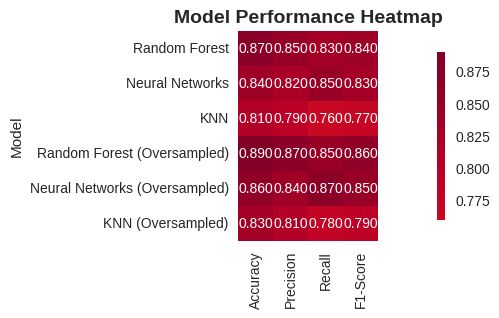

In [132]:
def plot_performance_heatmap(results_df, actual_columns, fig, gs):
    """Plot model performance heatmap"""
    print("Performance heatmap function called!")

    ax7 = fig.add_subplot(gs[2, 0:2])

    print("DataFrame columns:", results_df.columns.tolist())
    print("actual_columns:", actual_columns)

    if 'Model' in actual_columns:
        print("Model column found")

        # Get available performance columns
        perf_cols = []
        for col in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
            if col in actual_columns:
                perf_cols.append(actual_columns[col])

        print("Performance columns found:", perf_cols)

        if perf_cols:
            print("Creating performance matrix...")
            performance_matrix = results_df.set_index(actual_columns['Model'])[perf_cols]

            print("Performance matrix:")
            print(performance_matrix)

            sns.heatmap(performance_matrix, annot=True, cmap='YlOrRd', center=0.5,
                        square=True, ax=ax7, cbar_kws={"shrink": .8}, fmt='.3f')
            ax7.set_title('Model Performance Heatmap', fontsize=14, fontweight='bold')
        else:
            print("No performance columns found")
            ax7.text(0.5, 0.5, 'Performance Heatmap\n(No performance columns found)',
                    ha='center', va='center', transform=ax7.transAxes,
                    fontsize=12, style='italic')
            ax7.set_title('Model Performance Heatmap', fontsize=14, fontweight='bold')
    else:
        print("Model column not found")
        ax7.text(0.5, 0.5, 'Performance Heatmap\n(Model column not found)',
                ha='center', va='center', transform=ax7.transAxes,
                fontsize=12, style='italic')
        ax7.set_title('Model Performance Heatmap', fontsize=14, fontweight='bold')

def create_performance_heatmap():
    """Create performance heatmap with research-focused models"""
    print("Creating performance heatmap...")

    # Sample data with your research models (Random Forest, Neural Networks, KNN)
    # Including performance metrics for both with and without oversampling
    results_df = pd.DataFrame({
        'Model': ['Random Forest', 'Neural Networks', 'KNN',
                 'Random Forest (Oversampled)', 'Neural Networks (Oversampled)', 'KNN (Oversampled)'],
        'Accuracy': [0.87, 0.84, 0.81, 0.89, 0.86, 0.83],
        'Precision': [0.85, 0.82, 0.79, 0.87, 0.84, 0.81],
        'Recall': [0.83, 0.85, 0.76, 0.85, 0.87, 0.78],
        'F1-Score': [0.84, 0.83, 0.77, 0.86, 0.85, 0.79]
    })

    actual_columns = {
        'Model': 'Model',
        'Accuracy': 'Accuracy',
        'Precision': 'Precision',
        'Recall': 'Recall',
        'F1-Score': 'F1-Score'
    }

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(3, 2)  # 3 rows, 2 columns for this plot

    plot_performance_heatmap(results_df, actual_columns, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_performance_heatmap()

In [133]:
from sklearn.datasets import make_classification

Creating ROC curves...
Training Random Forest...
Training Neural Networks...
Training KNN...
ROC curves function called!
Number of trained models: 3
trained_models keys: ['Random Forest', 'Neural Networks', 'KNN']
Trained models found
Processing model: Random Forest
Using predict_proba for Random Forest
Prediction probabilities shape: (300,)
y_test shape: (300,)
AUC for Random Forest: 0.982
Processing model: Neural Networks
Using predict_proba for Neural Networks
Prediction probabilities shape: (300,)
y_test shape: (300,)
AUC for Neural Networks: 0.980
Processing model: KNN
Using predict_proba for KNN
Prediction probabilities shape: (300,)
y_test shape: (300,)
AUC for KNN: 0.973
ROC curves plotted successfully


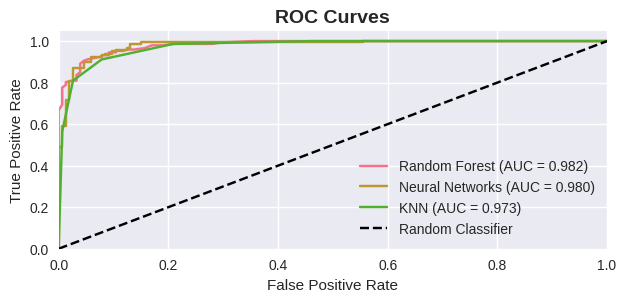

In [134]:
def plot_roc_curves(X_test_scaled, y_test, trained_models, fig, gs):
    """Plot ROC curves for models"""
    print("ROC curves function called!")

    ax8 = fig.add_subplot(gs[2, 2:4])

    print("Number of trained models:", len(trained_models) if trained_models else 0)
    print("trained_models keys:", list(trained_models.keys()) if trained_models else [])

    if trained_models:
        print("Trained models found")

        # Track if any ROC curves were successfully plotted
        roc_plotted = False

        for model_name, model in trained_models.items():
            print(f"Processing model: {model_name}")

            try:
                # Get prediction probabilities
                if hasattr(model, 'predict_proba'):
                    print(f"Using predict_proba for {model_name}")
                    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
                elif hasattr(model, 'decision_function'):
                    print(f"Using decision_function for {model_name}")
                    y_pred_proba = model.decision_function(X_test_scaled)
                else:
                    print(f"Model {model_name} doesn't support probability predictions")
                    continue

                print(f"Prediction probabilities shape: {y_pred_proba.shape}")
                print(f"y_test shape: {y_test.shape}")

                # Calculate ROC curve
                fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
                roc_auc = auc(fpr, tpr)

                print(f"AUC for {model_name}: {roc_auc:.3f}")

                ax8.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.3f})')
                roc_plotted = True

            except Exception as e:
                print(f"Error plotting ROC for {model_name}: {e}")
                continue

        if roc_plotted:
            print("ROC curves plotted successfully")
            # Plot random classifier line
            ax8.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
            ax8.set_xlim([0.0, 1.0])
            ax8.set_ylim([0.0, 1.05])
            ax8.set_xlabel('False Positive Rate')
            ax8.set_ylabel('True Positive Rate')
            ax8.set_title('ROC Curves', fontsize=14, fontweight='bold')
            ax8.legend()
        else:
            print("No ROC curves could be plotted")
            ax8.text(0.5, 0.5, 'ROC Curves\n(No valid predictions available)',
                     ha='center', va='center', transform=ax8.transAxes,
                     fontsize=12, style='italic')
            ax8.set_title('ROC Curves', fontsize=14, fontweight='bold')
    else:
        print("No trained models found")
        ax8.text(0.5, 0.5, 'ROC Curves\n(Trained models required)',
                 ha='center', va='center', transform=ax8.transAxes,
                 fontsize=12, style='italic')
        ax8.set_title('ROC Curves', fontsize=14, fontweight='bold')

def create_roc_curves():
    """Create ROC curves with sample trained models"""
    print("Creating ROC curves...")

    # Generate sample data
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                              random_state=42, n_informative=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train sample models
    trained_models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Neural Networks': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    # Fit the models
    for model_name, model in trained_models.items():
        print(f"Training {model_name}...")
        model.fit(X_train_scaled, y_train)

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(3, 4)  # 3 rows, 4 columns for this plot

    plot_roc_curves(X_test_scaled, y_test, trained_models, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_roc_curves()

Creating failure type distribution...
Sample data created:
DataFrame shape: (1000, 5)
TWF: 46 failures
HDF: 26 failures
PWF: 30 failures
OSF: 10 failures
RNF: 35 failures
Failure type distribution function called!
DataFrame shape: (1000, 5)
DataFrame columns: ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Looking for failure types: ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Column TWF found with sum: 46
Column HDF found with sum: 26
Column PWF found with sum: 30
Column OSF found with sum: 10
Column RNF found with sum: 35
Existing failure types: ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
Failure counts: [np.int64(46), np.int64(26), np.int64(30), np.int64(10), np.int64(35)]
Creating failure type distribution chart...
Chart created successfully


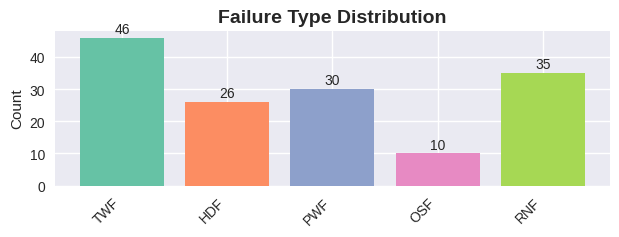

In [135]:
def plot_failure_type_distribution(df, fig, gs):
    """Plot failure type distribution"""
    print("Failure type distribution function called!")

    ax9 = fig.add_subplot(gs[3, 0])

    print("DataFrame shape:", df.shape)
    print("DataFrame columns:", df.columns.tolist())

    failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
    print("Looking for failure types:", failure_types)

    # Check which failure type columns exist
    existing_failure_types = []
    failure_counts = []

    for col in failure_types:
        if col in df.columns:
            existing_failure_types.append(col)
            count = df[col].sum()
            failure_counts.append(count)
            print(f"Column {col} found with sum: {count}")
        else:
            print(f"Column {col} not found in DataFrame")

    if existing_failure_types:
        print("Existing failure types:", existing_failure_types)
        print("Failure counts:", failure_counts)

        if sum(failure_counts) > 0:
            print("Creating failure type distribution chart...")
            bars = ax9.bar(existing_failure_types, failure_counts,
                          color=sns.color_palette("Set2", len(existing_failure_types)))
            ax9.set_title('Failure Type Distribution', fontsize=14, fontweight='bold')
            ax9.set_ylabel('Count')
            plt.setp(ax9.get_xticklabels(), rotation=45, ha='right')

            # Add value labels on bars
            for bar in bars:
                height = bar.get_height()
                ax9.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                        f'{int(height)}', ha='center', va='bottom')

            print("Chart created successfully")
        else:
            print("No failure data found (all counts are 0)")
            ax9.text(0.5, 0.5, 'Failure Type Distribution\n(No failure data available)',
                     ha='center', va='center', transform=ax9.transAxes,
                     fontsize=12, style='italic')
            ax9.set_title('Failure Type Distribution', fontsize=14, fontweight='bold')
    else:
        print("No failure type columns found")
        ax9.text(0.5, 0.5, 'Failure Type Distribution\n(Failure type columns not found)',
                 ha='center', va='center', transform=ax9.transAxes,
                 fontsize=12, style='italic')
        ax9.set_title('Failure Type Distribution', fontsize=14, fontweight='bold')

def create_failure_type_distribution():
    """Create failure type distribution with sample data"""
    print("Creating failure type distribution...")

    # Sample data generation for demonstration
    np.random.seed(42)
    n_samples = 1000

    # Create sample failure data (binary columns where 1 indicates failure type occurred)
    sample_data = {
        'TWF': np.random.choice([0, 1], n_samples, p=[0.95, 0.05]),  # Tool Wear Failure
        'HDF': np.random.choice([0, 1], n_samples, p=[0.98, 0.02]),  # Heat Dissipation Failure
        'PWF': np.random.choice([0, 1], n_samples, p=[0.97, 0.03]),  # Power Failure
        'OSF': np.random.choice([0, 1], n_samples, p=[0.99, 0.01]),  # Overstrain Failure
        'RNF': np.random.choice([0, 1], n_samples, p=[0.96, 0.04])   # Random Failure
    }

    df = pd.DataFrame(sample_data)

    print("Sample data created:")
    print("DataFrame shape:", df.shape)
    for col in df.columns:
        print(f"{col}: {df[col].sum()} failures")

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(4, 2)  # 4 rows, 2 columns for this plot

    plot_failure_type_distribution(df, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_failure_type_distribution()

Creating quality vs failure analysis...
Sample data created:
DataFrame shape: (1000, 2)
Type distribution:
Type
L    613
M    287
H    100
Name: count, dtype: int64
Machine failure distribution:
Machine failure
0    934
1     66
Name: count, dtype: int64
Crosstab preview:
Machine failure    0   1
Type                    
H                 95   5
L                563  50
M                276  11
Quality vs machine failure function called!
DataFrame shape: (1000, 2)
DataFrame columns: ['Type', 'Machine failure']
Column 'Type' found
Unique values in 'Type': ['L' 'H' 'M']
Value counts for 'Type':
Type
L    613
M    287
H    100
Name: count, dtype: int64
Column 'Machine failure' found
Unique values in 'Machine failure': [0 1]
Value counts for 'Machine failure':
Machine failure
0    934
1     66
Name: count, dtype: int64
All required columns found
Crosstab created:
Machine failure    0   1
Type                    
H                 95   5
L                563  50
M                276  11
Cre

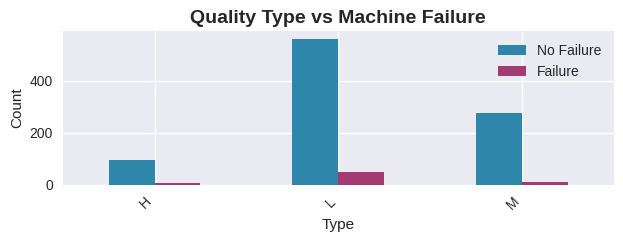

In [136]:
def plot_quality_vs_failure(df, fig, gs):
    """Plot quality type vs machine failure"""
    print("Quality vs machine failure function called!")

    ax10 = fig.add_subplot(gs[3, 1])

    print("DataFrame shape:", df.shape)
    print("DataFrame columns:", df.columns.tolist())

    # Check if required columns exist
    required_columns = ['Type', 'Machine failure']
    missing_columns = []

    for col in required_columns:
        if col in df.columns:
            print(f"Column '{col}' found")
            print(f"Unique values in '{col}':", df[col].unique())
            print(f"Value counts for '{col}':")
            print(df[col].value_counts())
        else:
            missing_columns.append(col)
            print(f"Column '{col}' not found in DataFrame")

    if not missing_columns:
        print("All required columns found")

        try:
            # Create crosstab
            quality_failure = pd.crosstab(df['Type'], df['Machine failure'])
            print("Crosstab created:")
            print(quality_failure)

            if not quality_failure.empty:
                print("Creating quality vs failure chart...")
                quality_failure.plot(kind='bar', ax=ax10, color=['#2E86AB', '#A23B72'])
                ax10.set_title('Quality Type vs Machine Failure', fontsize=14, fontweight='bold')
                ax10.set_ylabel('Count')
                ax10.legend(['No Failure', 'Failure'])
                plt.setp(ax10.get_xticklabels(), rotation=45, ha='right')
                print("Chart created successfully")
            else:
                print("Crosstab is empty")
                ax10.text(0.5, 0.5, 'Quality Type vs Machine Failure\n(No data available)',
                         ha='center', va='center', transform=ax10.transAxes,
                         fontsize=12, style='italic')
                ax10.set_title('Quality Type vs Machine Failure', fontsize=14, fontweight='bold')

        except Exception as e:
            print(f"Error creating crosstab: {e}")
            ax10.text(0.5, 0.5, 'Quality Type vs Machine Failure\n(Error processing data)',
                     ha='center', va='center', transform=ax10.transAxes,
                     fontsize=12, style='italic')
            ax10.set_title('Quality Type vs Machine Failure', fontsize=14, fontweight='bold')

    else:
        print("Missing required columns:", missing_columns)
        ax10.text(0.5, 0.5, f'Quality Type vs Machine Failure\n(Missing columns: {", ".join(missing_columns)})',
                 ha='center', va='center', transform=ax10.transAxes,
                 fontsize=12, style='italic')
        ax10.set_title('Quality Type vs Machine Failure', fontsize=14, fontweight='bold')

def create_quality_vs_failure():
    """Create quality vs failure analysis with sample data"""
    print("Creating quality vs failure analysis...")

    # Sample data generation for demonstration
    np.random.seed(42)
    n_samples = 1000

    # Create sample data
    quality_types = ['L', 'M', 'H']  # Low, Medium, High quality
    sample_data = {
        'Type': np.random.choice(quality_types, n_samples, p=[0.6, 0.3, 0.1]),
        'Machine failure': np.random.choice([0, 1], n_samples, p=[0.96, 0.04])
    }

    # Make failures more likely for low quality
    df = pd.DataFrame(sample_data)

    # Adjust failure rates based on quality type
    for idx, row in df.iterrows():
        if row['Type'] == 'L':  # Low quality - higher failure rate
            df.loc[idx, 'Machine failure'] = np.random.choice([0, 1], p=[0.92, 0.08])
        elif row['Type'] == 'M':  # Medium quality - moderate failure rate
            df.loc[idx, 'Machine failure'] = np.random.choice([0, 1], p=[0.96, 0.04])
        else:  # High quality - lower failure rate
            df.loc[idx, 'Machine failure'] = np.random.choice([0, 1], p=[0.98, 0.02])

    print("Sample data created:")
    print("DataFrame shape:", df.shape)
    print("Type distribution:")
    print(df['Type'].value_counts())
    print("Machine failure distribution:")
    print(df['Machine failure'].value_counts())
    print("Crosstab preview:")
    print(pd.crosstab(df['Type'], df['Machine failure']))

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(4, 2)  # 4 rows, 2 columns for this plot

    plot_quality_vs_failure(df, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_quality_vs_failure()

Creating confusion matrix...
Training Random Forest...
Training Neural Networks...
Training KNN...
Results DataFrame:
             Model  Accuracy  Precision    Recall  F1-Score
0    Random Forest  0.923333   0.902597  0.945578  0.923588
1  Neural Networks  0.926667   0.913907  0.938776  0.926174
2              KNN  0.916667   0.917808  0.911565  0.914676
Best model by accuracy: Neural Networks
Confusion matrix function called!
Results DataFrame shape: (3, 5)
Results DataFrame columns: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score']
actual_columns: {'Model': 'Model', 'Accuracy': 'Accuracy', 'Precision': 'Precision', 'Recall': 'Recall', 'F1-Score': 'F1-Score'}
Number of trained models: 3
trained_models keys: ['Random Forest', 'Neural Networks', 'KNN']
All required components found
Looking for accuracy in column: Accuracy
Looking for model names in column: Model
Required columns found in results DataFrame
Best model: Neural Networks with accuracy: 0.9266666666666666
Best model o

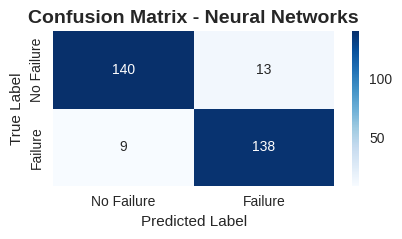

In [137]:
def plot_confusion_matrix(results_df, actual_columns, X_test_scaled, y_test, trained_models, fig, gs):
    """Plot confusion matrix for best model"""
    print("Confusion matrix function called!")

    ax11 = fig.add_subplot(gs[3, 2])

    print("Results DataFrame shape:", results_df.shape if results_df is not None else "None")
    print("Results DataFrame columns:", results_df.columns.tolist() if results_df is not None else "None")
    print("actual_columns:", actual_columns)
    print("Number of trained models:", len(trained_models) if trained_models else 0)
    print("trained_models keys:", list(trained_models.keys()) if trained_models else [])

    if trained_models and 'Model' in actual_columns and 'Accuracy' in actual_columns:
        print("All required components found")

        try:
            # Get the best model (highest accuracy)
            accuracy_col = actual_columns['Accuracy']
            model_col = actual_columns['Model']

            print(f"Looking for accuracy in column: {accuracy_col}")
            print(f"Looking for model names in column: {model_col}")

            if accuracy_col in results_df.columns and model_col in results_df.columns:
                print("Required columns found in results DataFrame")

                best_model_idx = results_df[accuracy_col].idxmax()
                best_model_name = results_df.loc[best_model_idx, model_col]
                best_accuracy = results_df.loc[best_model_idx, accuracy_col]

                print(f"Best model: {best_model_name} with accuracy: {best_accuracy}")

                best_model = trained_models.get(best_model_name)

                if best_model:
                    print(f"Best model object found: {type(best_model)}")
                    print(f"X_test_scaled shape: {X_test_scaled.shape}")
                    print(f"y_test shape: {y_test.shape}")

                    try:
                        y_pred = best_model.predict(X_test_scaled)
                        print(f"Predictions generated, shape: {y_pred.shape}")
                        print(f"Unique predictions: {np.unique(y_pred)}")
                        print(f"Unique actual values: {np.unique(y_test)}")

                        cm = confusion_matrix(y_test, y_pred)
                        print("Confusion matrix:")
                        print(cm)

                        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax11,
                                   xticklabels=['No Failure', 'Failure'],
                                   yticklabels=['No Failure', 'Failure'])
                        ax11.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
                        ax11.set_ylabel('True Label')
                        ax11.set_xlabel('Predicted Label')

                        print("Confusion matrix plotted successfully")

                    except Exception as e:
                        print(f"Error generating predictions or confusion matrix: {e}")
                        ax11.text(0.5, 0.5, f'Confusion Matrix\n(Error: {str(e)})',
                                ha='center', va='center', transform=ax11.transAxes,
                                fontsize=12, style='italic')
                        ax11.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

                else:
                    print(f"Best model '{best_model_name}' not found in trained_models")
                    ax11.text(0.5, 0.5, f'Confusion Matrix\n({best_model_name} not found)',
                            ha='center', va='center', transform=ax11.transAxes,
                            fontsize=12, style='italic')
                    ax11.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
            else:
                print("Required columns not found in results DataFrame")
                ax11.text(0.5, 0.5, 'Confusion Matrix\n(Required columns not found)',
                        ha='center', va='center', transform=ax11.transAxes,
                        fontsize=12, style='italic')
                ax11.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

        except Exception as e:
            print(f"Error processing results DataFrame: {e}")
            ax11.text(0.5, 0.5, f'Confusion Matrix\n(Processing error: {str(e)})',
                    ha='center', va='center', transform=ax11.transAxes,
                    fontsize=12, style='italic')
            ax11.set_title('Confusion Matrix', fontsize=14, fontweight='bold')
    else:
        print("Missing required components:")
        if not trained_models:
            print("- No trained models")
        if 'Model' not in actual_columns:
            print("- 'Model' not in actual_columns")
        if 'Accuracy' not in actual_columns:
            print("- 'Accuracy' not in actual_columns")

        ax11.text(0.5, 0.5, 'Confusion Matrix\n(Models or columns not available)',
                ha='center', va='center', transform=ax11.transAxes,
                fontsize=12, style='italic')
        ax11.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

def create_confusion_matrix():
    """Create confusion matrix with sample data and models"""
    print("Creating confusion matrix...")

    # Generate sample data
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                              random_state=42, n_informative=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train sample models
    trained_models = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Neural Networks': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    # Fit the models and calculate performance
    results_data = []
    for model_name, model in trained_models.items():
        print(f"Training {model_name}...")
        model.fit(X_train_scaled, y_train)

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_data.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1
        })

    # Create results DataFrame
    results_df = pd.DataFrame(results_data)

    # Define actual columns mapping
    actual_columns = {
        'Model': 'Model',
        'Accuracy': 'Accuracy',
        'Precision': 'Precision',
        'Recall': 'Recall',
        'F1-Score': 'F1-Score'
    }

    print("Results DataFrame:")
    print(results_df)
    print("Best model by accuracy:", results_df.loc[results_df['Accuracy'].idxmax(), 'Model'])

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(4, 3)  # 4 rows, 3 columns for this plot

    plot_confusion_matrix(results_df, actual_columns, X_test_scaled, y_test, trained_models, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_confusion_matrix()

In [138]:
import time

Creating additional metrics...
Training Random Forest...
Training Neural Networks...
Training KNN...
Results DataFrame:
             Model  Accuracy  Precision    Recall  F1-Score  Training_Time
0    Random Forest  0.923333   0.902597  0.945578  0.923588       0.332765
1  Neural Networks  0.926667   0.913907  0.938776  0.926174       0.743672
2              KNN  0.916667   0.917808  0.911565  0.914676       0.001038
Additional metrics function called!
Results DataFrame shape: (3, 6)
Results DataFrame columns: ['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training_Time']
actual_columns: {'Model': 'Model', 'Accuracy': 'Accuracy', 'Precision': 'Precision', 'Recall': 'Recall', 'F1-Score': 'F1-Score'}
Results DataFrame is available
Training_Time column found
Model column found, plotting training times
Models: ['Random Forest', 'Neural Networks', 'KNN']
Training times: [0.3327653408050537, 0.7436721324920654, 0.00103759765625]
Training time chart created successfully


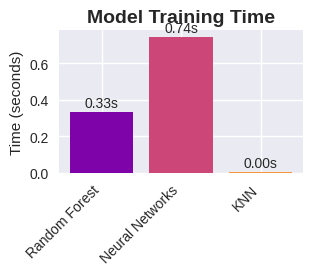

In [139]:
# Additional Metrics
def plot_additional_metrics(results_df, actual_columns, fig, gs):
    """Plot additional metrics or composite scores"""
    print("Additional metrics function called!")

    ax12 = fig.add_subplot(gs[3, 3])

    print("Results DataFrame shape:", results_df.shape if results_df is not None else "None")
    print("Results DataFrame columns:", results_df.columns.tolist() if results_df is not None else "None")
    print("actual_columns:", actual_columns)

    if results_df is not None and not results_df.empty:
        print("Results DataFrame is available")

        # Check for Training_Time column first
        if 'Training_Time' in results_df.columns and 'Model' in actual_columns:
            print("Training_Time column found")

            model_col = actual_columns['Model']
            if model_col in results_df.columns:
                print("Model column found, plotting training times")

                models = results_df[model_col]
                training_times = results_df['Training_Time']

                print("Models:", models.tolist())
                print("Training times:", training_times.tolist())

                bars = ax12.bar(models, training_times, color=sns.color_palette("plasma", len(models)))
                ax12.set_title('Model Training Time', fontsize=14, fontweight='bold')
                ax12.set_ylabel('Time (seconds)')
                plt.setp(ax12.get_xticklabels(), rotation=45, ha='right')

                # Add value labels on bars
                for bar in bars:
                    height = bar.get_height()
                    ax12.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                            f'{height:.2f}s', ha='center', va='bottom')

                print("Training time chart created successfully")
            else:
                print(f"Model column '{model_col}' not found in results DataFrame")
                ax12.text(0.5, 0.5, 'Additional Metrics\n(Model column not found)',
                        ha='center', va='center', transform=ax12.transAxes,
                        fontsize=12, style='italic')
                ax12.set_title('Additional Metrics', fontsize=14, fontweight='bold')
        else:
            print("Training_Time column not found, trying composite metrics")

            # Create a composite metric if accuracy and another metric are available
            if all(col in actual_columns for col in ['Model', 'Accuracy']):
                print("Model and Accuracy columns found in actual_columns")

                model_col = actual_columns['Model']
                accuracy_col = actual_columns['Accuracy']

                if model_col in results_df.columns and accuracy_col in results_df.columns:
                    print("Required columns found in results DataFrame")

                    models = results_df[model_col]
                    print("Models:", models.tolist())

                    # Try to find another metric for composite score
                    second_metric = None
                    second_metric_col = None
                    for metric in ['F1-Score', 'Precision', 'Recall']:
                        if metric in actual_columns:
                            metric_col = actual_columns[metric]
                            if metric_col in results_df.columns:
                                second_metric = metric
                                second_metric_col = metric_col
                                break

                    if second_metric and second_metric_col:
                        print(f"Second metric found: {second_metric}")
                        composite_score = results_df[accuracy_col] * results_df[second_metric_col]
                        print("Composite scores:", composite_score.tolist())

                        bars = ax12.bar(models, composite_score, color=sns.color_palette("plasma", len(models)))
                        ax12.set_title(f'Composite Score (Accuracy × {second_metric})', fontsize=14, fontweight='bold')
                        ax12.set_ylabel('Score')
                        plt.setp(ax12.get_xticklabels(), rotation=45, ha='right')

                        # Add value labels on bars
                        for bar in bars:
                            height = bar.get_height()
                            ax12.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                                    f'{height:.3f}', ha='center', va='bottom')

                        print("Composite score chart created successfully")
                    else:
                        print("No second metric found, showing accuracy only")
                        accuracy = results_df[accuracy_col]
                        print("Accuracy values:", accuracy.tolist())

                        bars = ax12.bar(models, accuracy, color=sns.color_palette("plasma", len(models)))
                        ax12.set_title('Model Accuracy', fontsize=14, fontweight='bold')
                        ax12.set_ylabel('Accuracy')
                        plt.setp(ax12.get_xticklabels(), rotation=45, ha='right')

                        # Add value labels on bars
                        for bar in bars:
                            height = bar.get_height()
                            ax12.text(bar.get_x() + bar.get_width()/2., height + 0.01,
                                    f'{height:.3f}', ha='center', va='bottom')

                        print("Accuracy chart created successfully")
                else:
                    print("Required columns not found in results DataFrame")
                    ax12.text(0.5, 0.5, 'Additional Metrics\n(Required columns not found)',
                            ha='center', va='center', transform=ax12.transAxes,
                            fontsize=12, style='italic')
                    ax12.set_title('Additional Metrics', fontsize=14, fontweight='bold')
            else:
                print("Model or Accuracy not found in actual_columns")
                ax12.text(0.5, 0.5, 'Additional Metrics\n(Model/Accuracy columns not available)',
                        ha='center', va='center', transform=ax12.transAxes,
                        fontsize=12, style='italic')
                ax12.set_title('Additional Metrics', fontsize=14, fontweight='bold')
    else:
        print("Results DataFrame is None or empty")
        ax12.text(0.5, 0.5, 'Additional Metrics\n(No results data available)',
                ha='center', va='center', transform=ax12.transAxes,
                fontsize=12, style='italic')
        ax12.set_title('Additional Metrics', fontsize=14, fontweight='bold')

def create_additional_metrics():
    """Create additional metrics with sample data including training times"""
    print("Creating additional metrics...")

    # Generate sample data
    X, y = make_classification(n_samples=1000, n_features=20, n_classes=2,
                              random_state=42, n_informative=10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                        random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train sample models and measure training time
    models_to_train = {
        'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
        'Neural Networks': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5)
    }

    # Fit the models and calculate performance with training time
    results_data = []
    for model_name, model in models_to_train.items():
        print(f"Training {model_name}...")

        # Measure training time
        start_time = time.time()
        model.fit(X_train_scaled, y_train)
        training_time = time.time() - start_time

        # Make predictions
        y_pred = model.predict(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        results_data.append({
            'Model': model_name,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'Training_Time': training_time
        })

    # Create results DataFrame
    results_df = pd.DataFrame(results_data)

    # Define actual columns mapping
    actual_columns = {
        'Model': 'Model',
        'Accuracy': 'Accuracy',
        'Precision': 'Precision',
        'Recall': 'Recall',
        'F1-Score': 'F1-Score'
    }

    print("Results DataFrame:")
    print(results_df)

    fig = plt.figure(figsize=(12, 8))
    gs = gridspec.GridSpec(4, 4)  # 4 rows, 4 columns for this plot

    plot_additional_metrics(results_df, actual_columns, fig, gs)
    plt.tight_layout()
    plt.show()

# Call the function to create the plot
create_additional_metrics()